In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

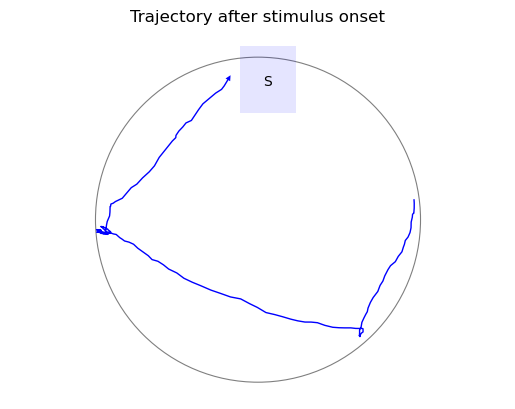

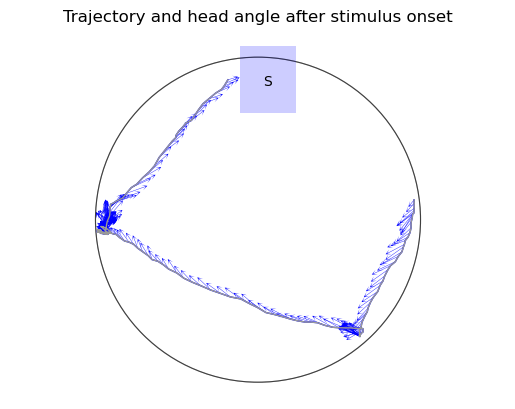

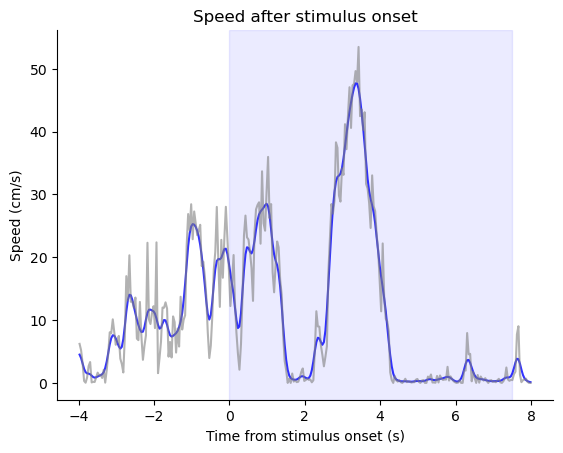

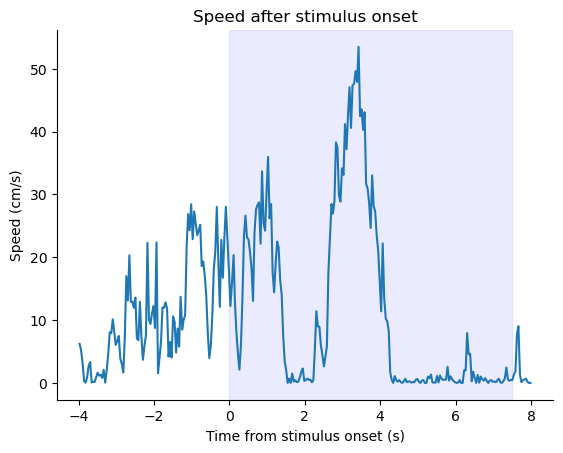

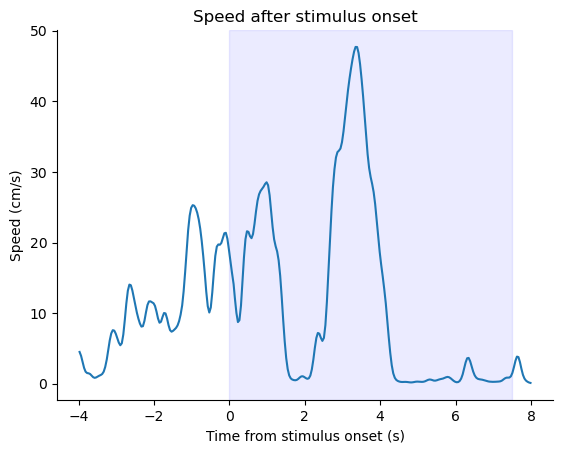

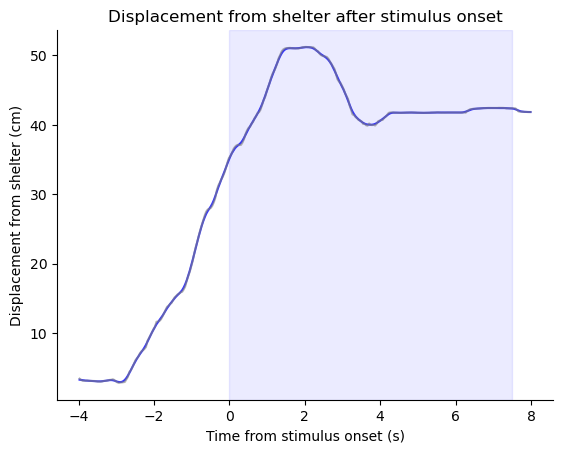

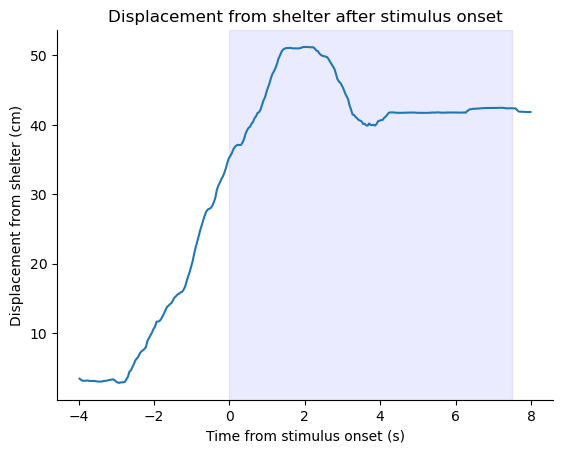

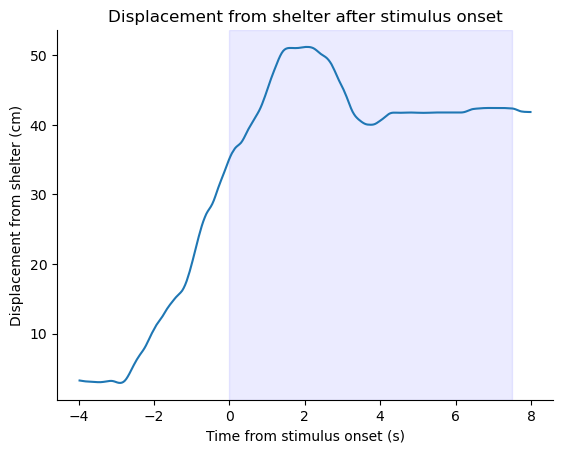

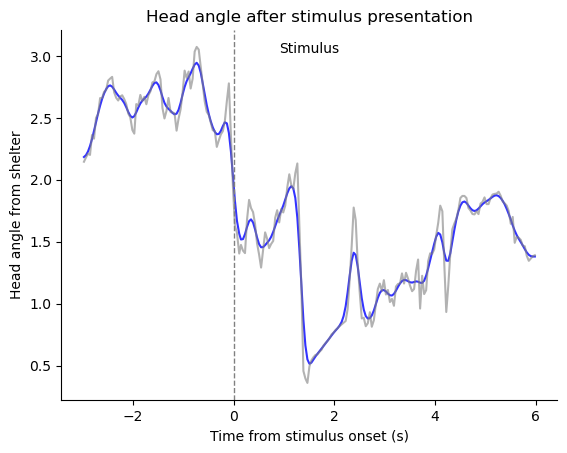

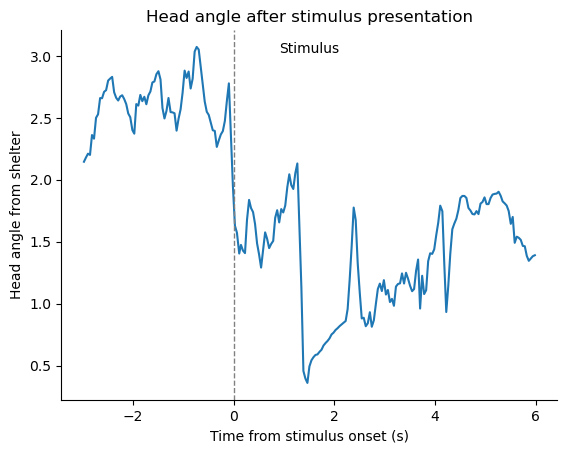

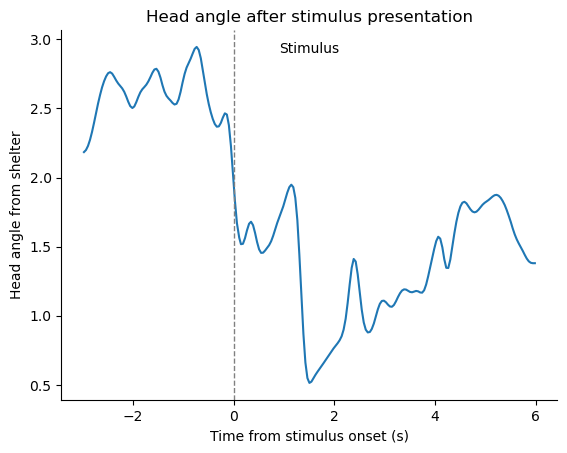

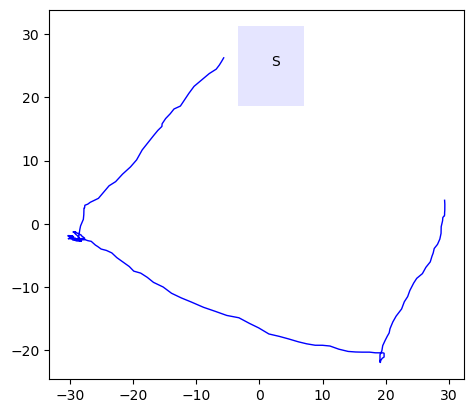

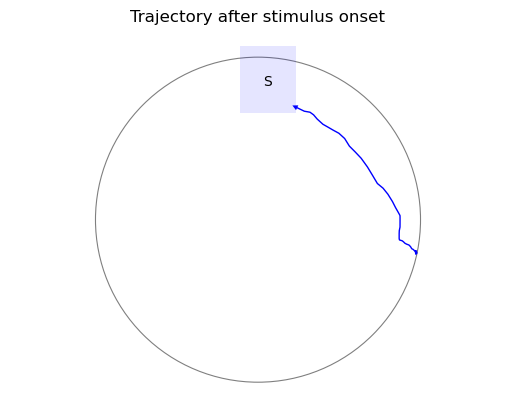

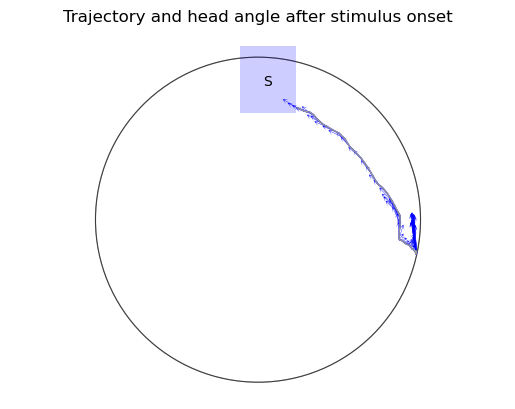

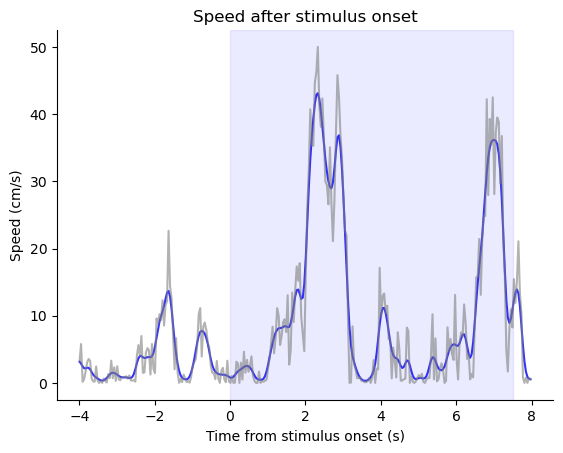

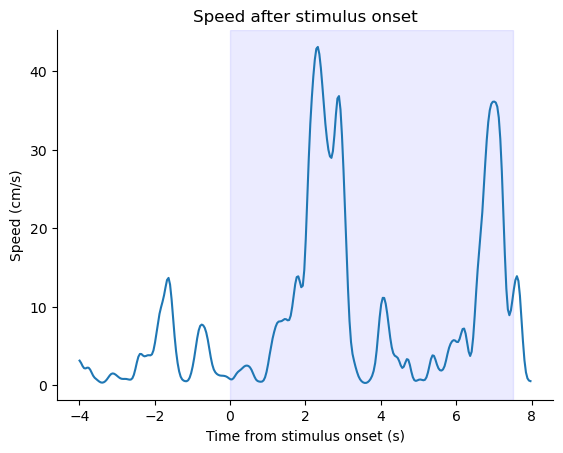

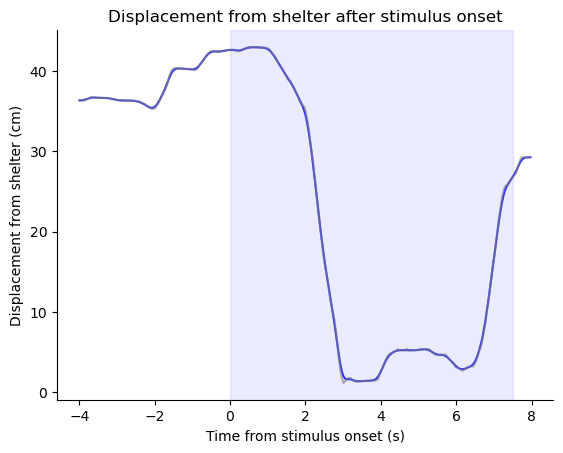

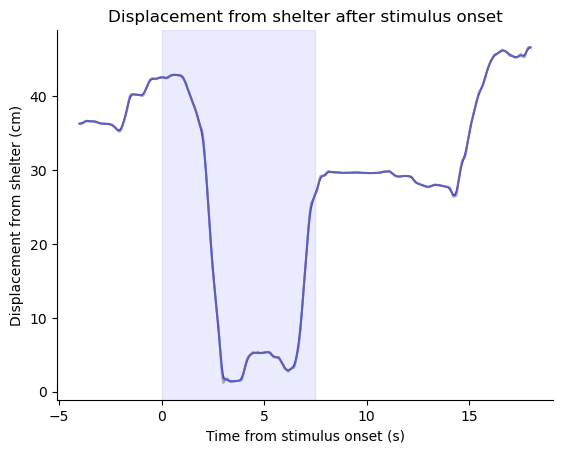

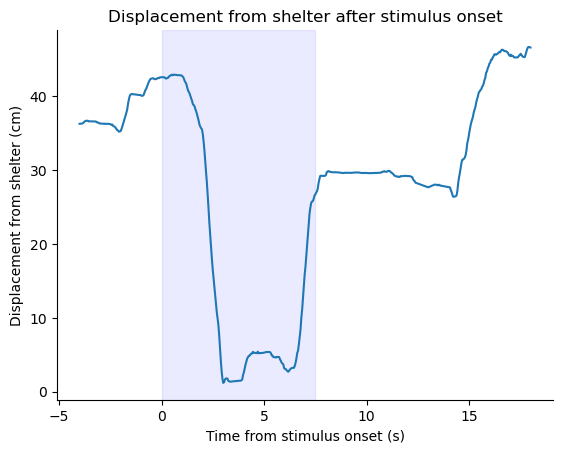

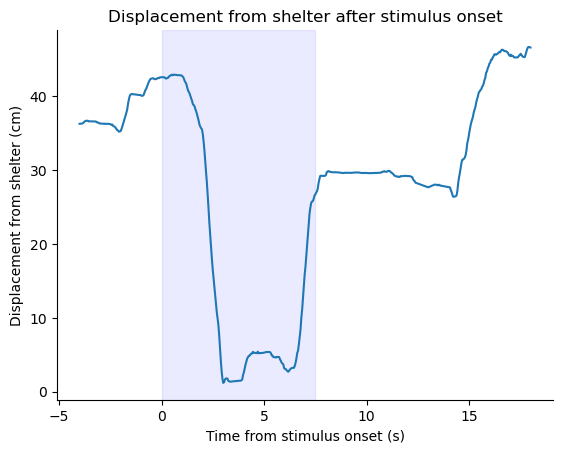

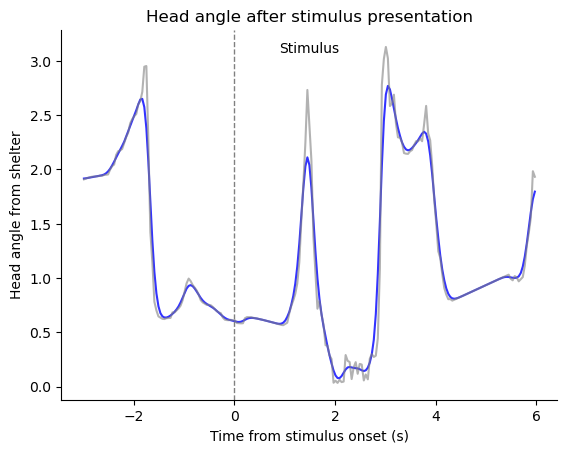

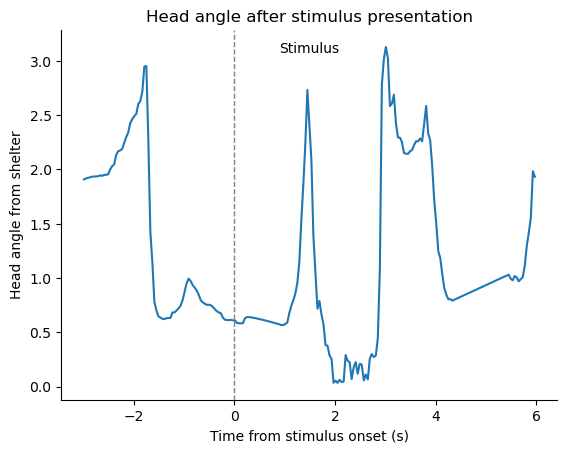

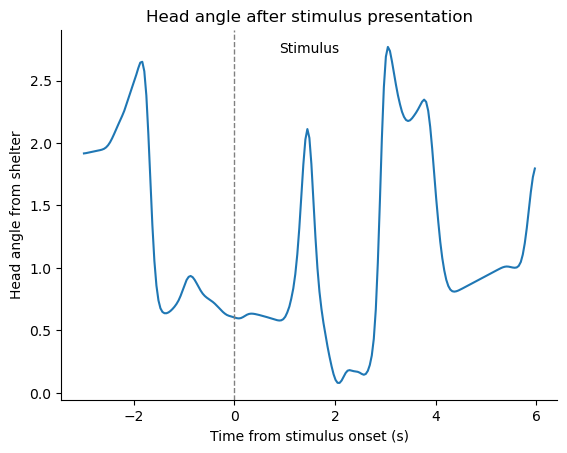

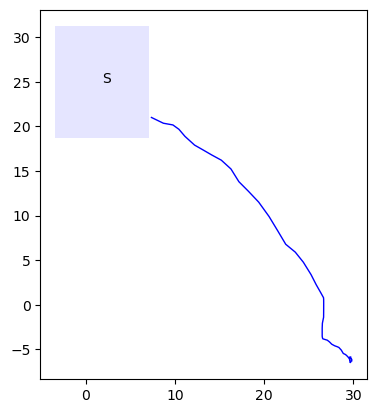

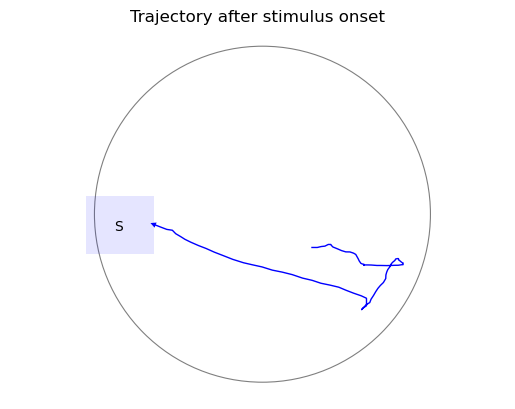

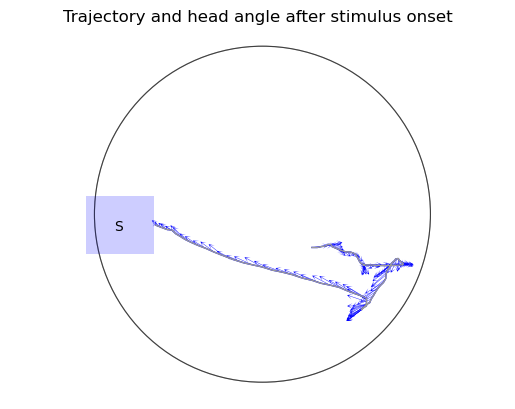

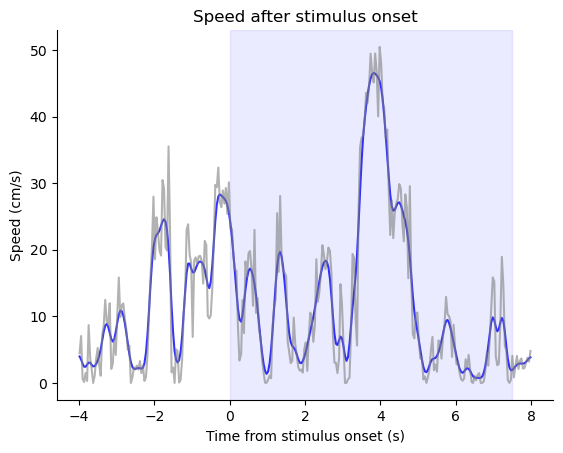

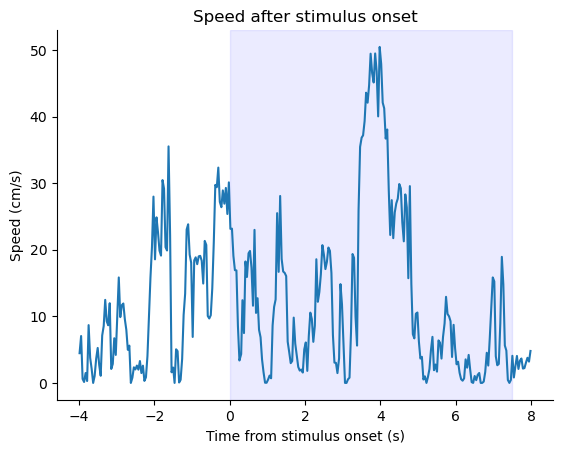

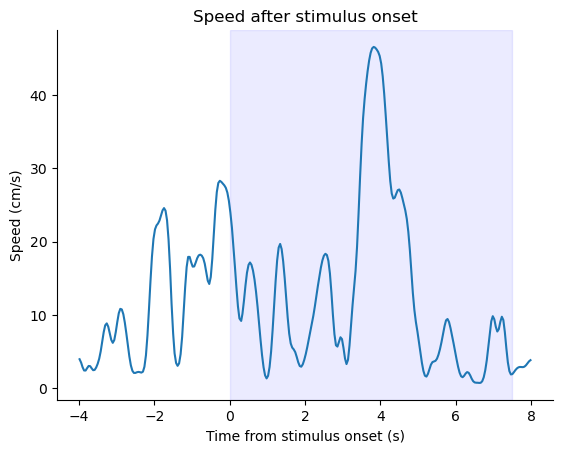

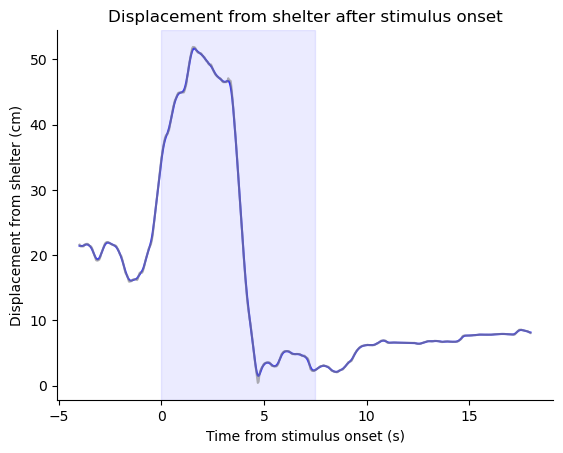

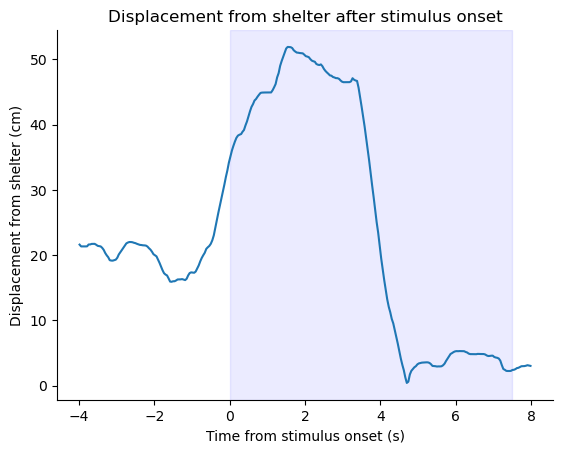

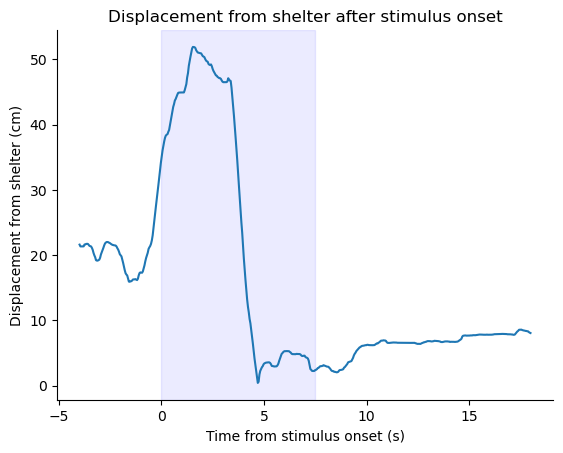

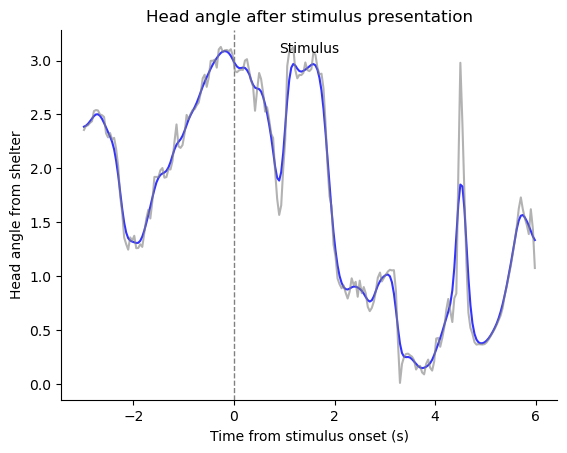

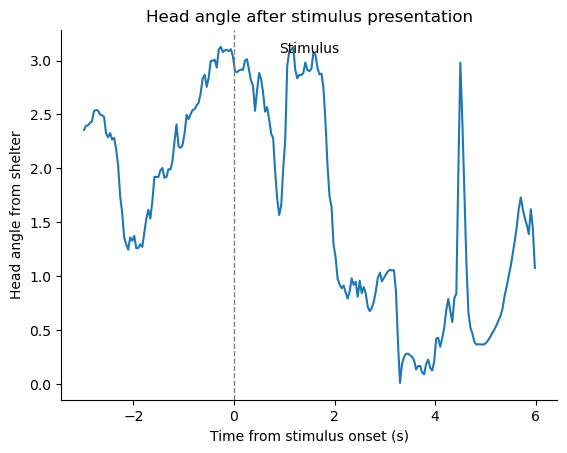

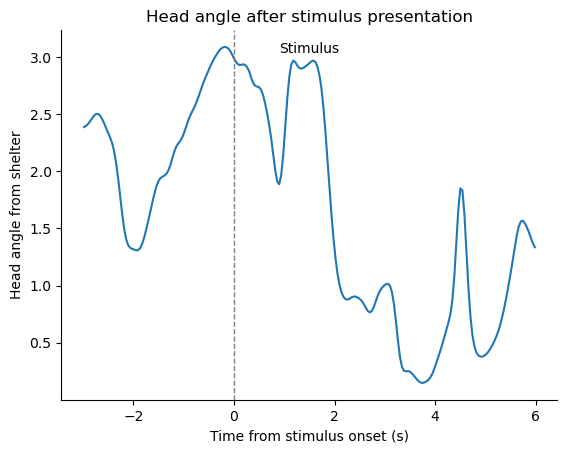

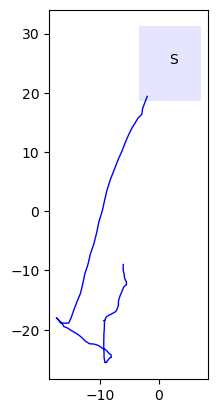

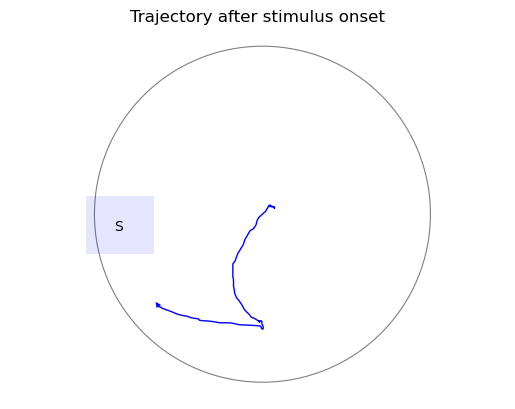

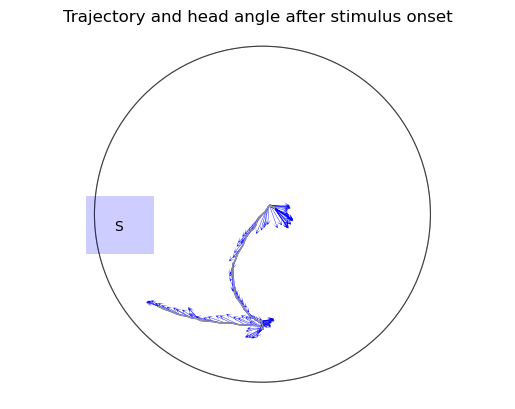

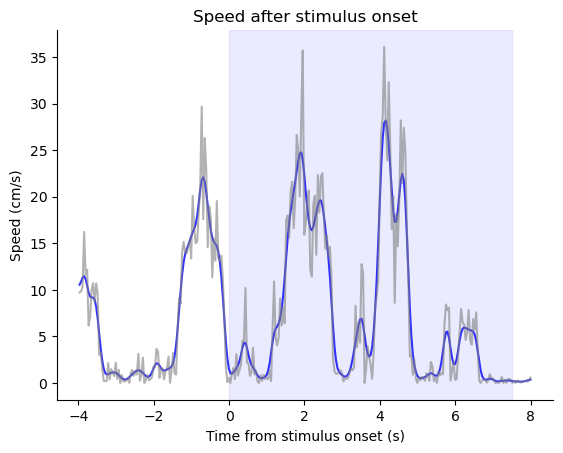

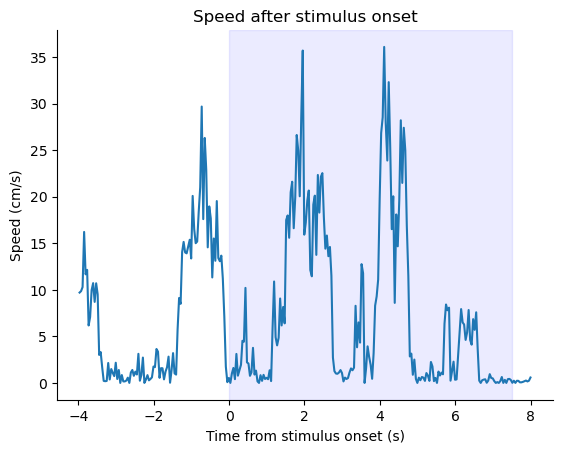

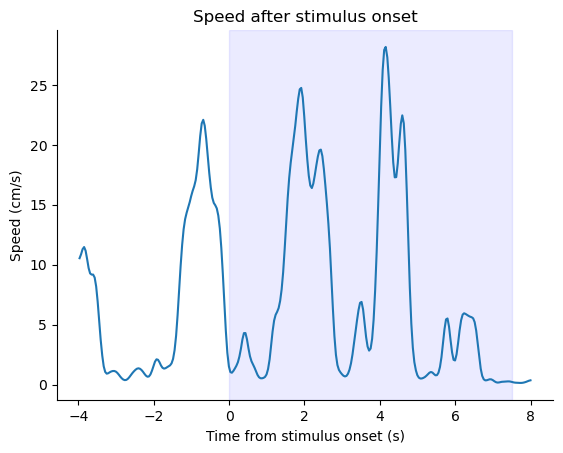

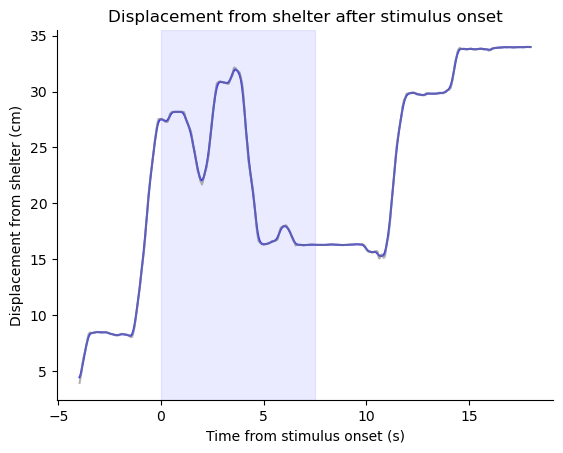

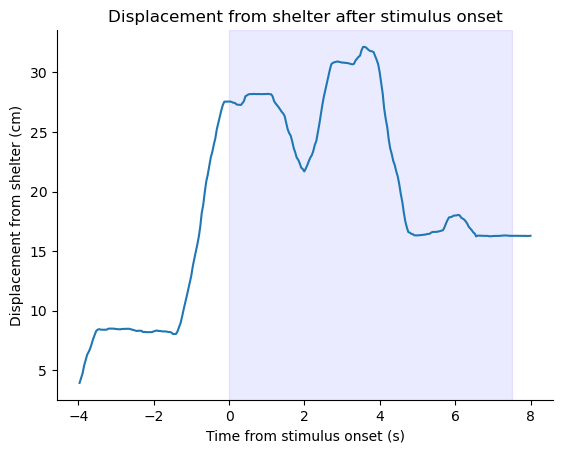

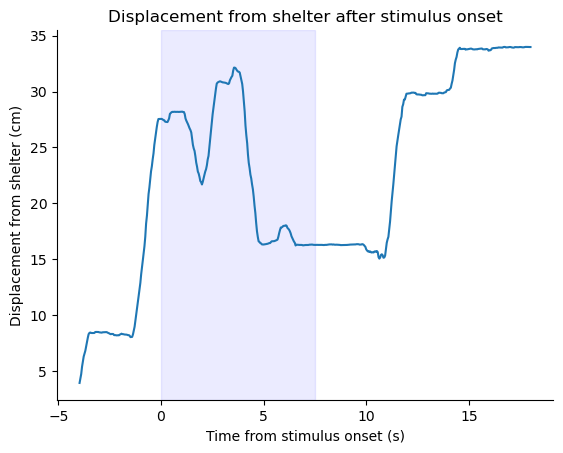

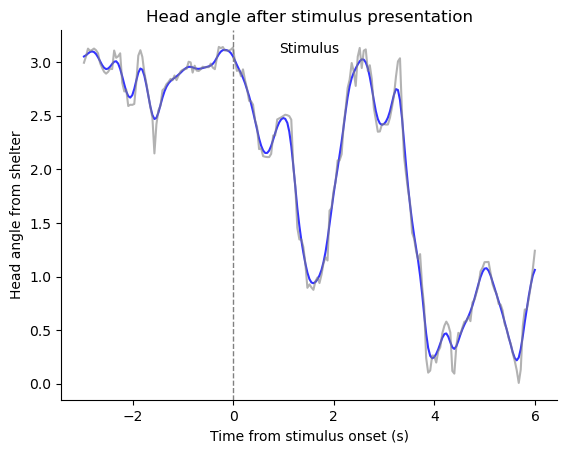

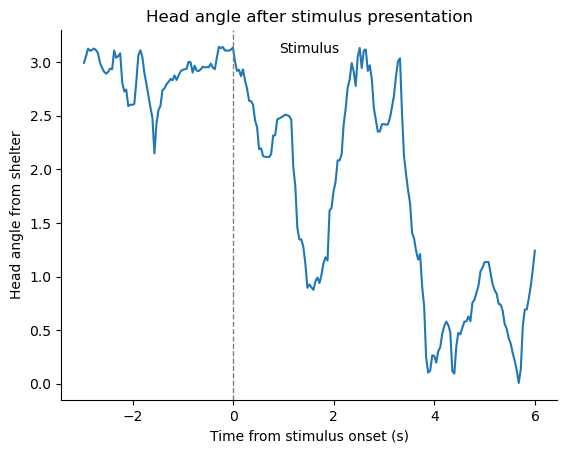

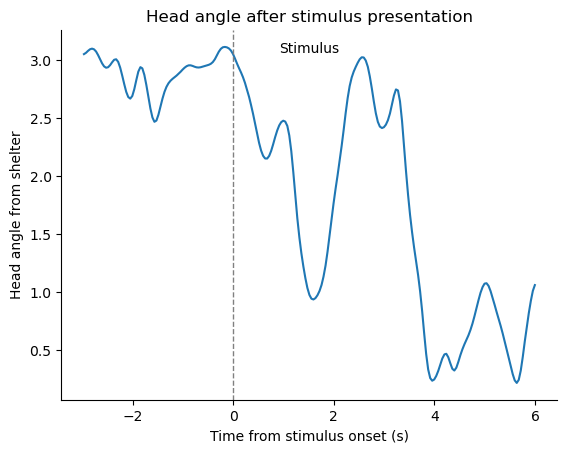

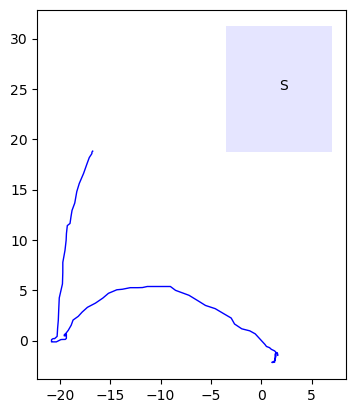

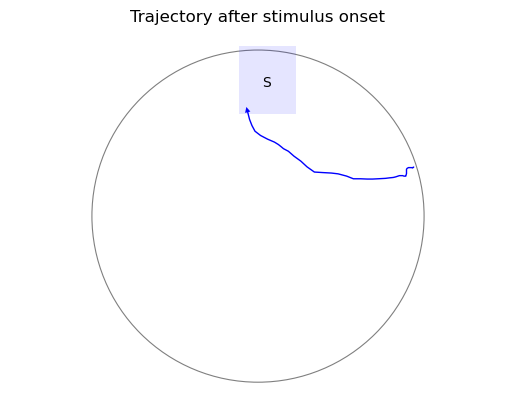

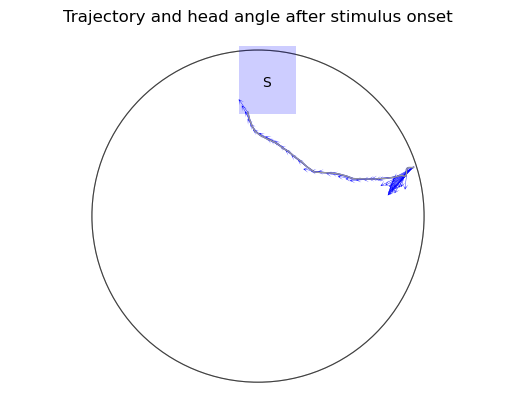

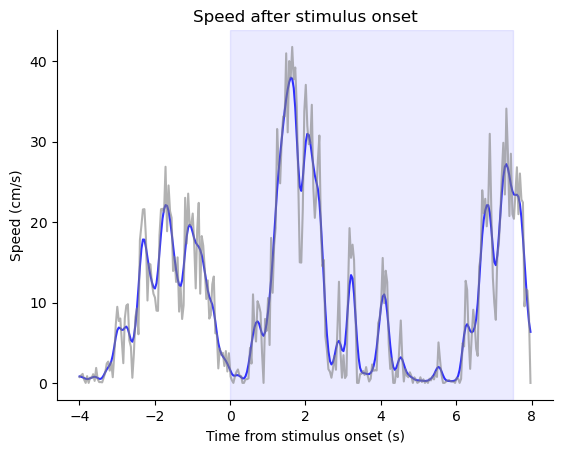

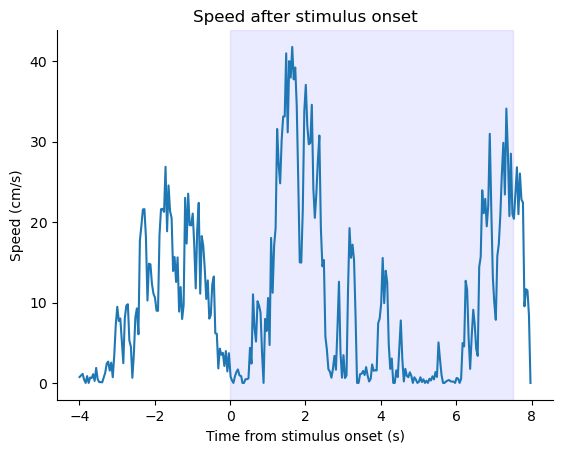

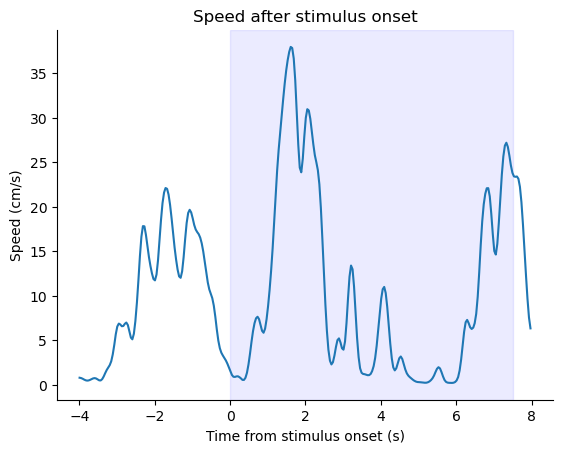

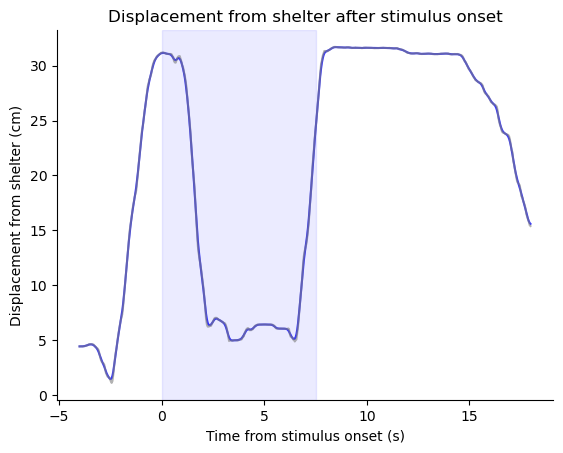

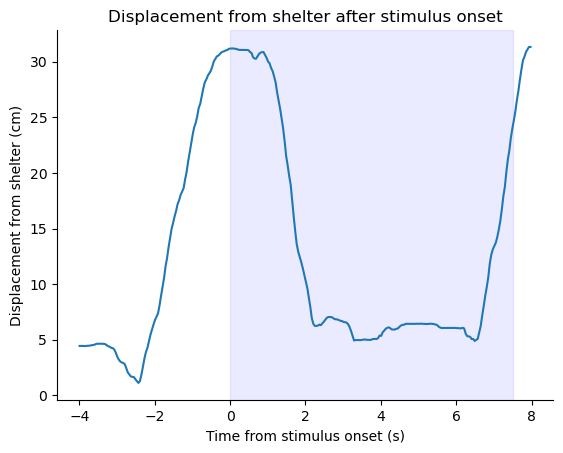

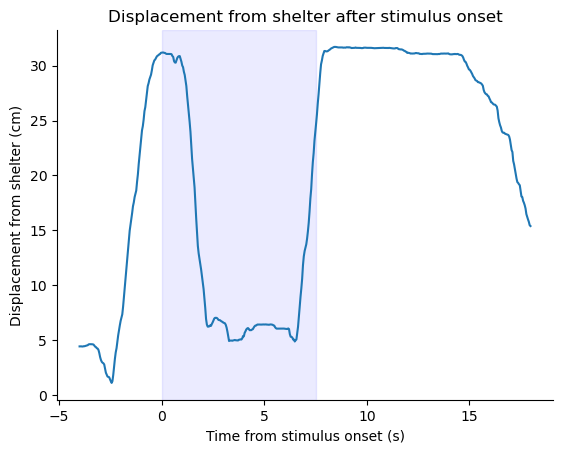

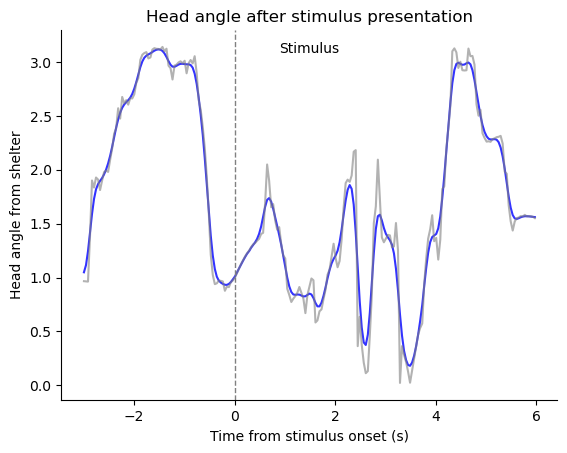

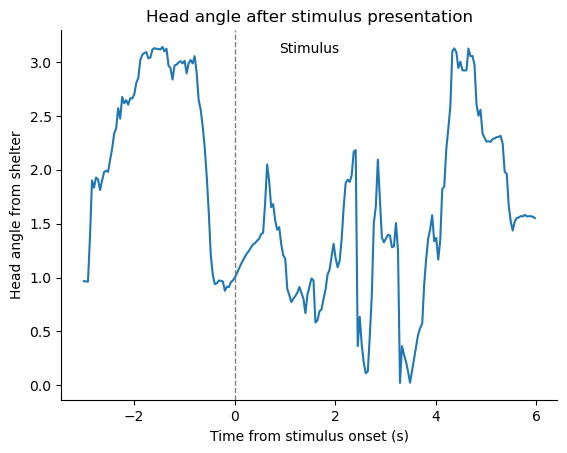

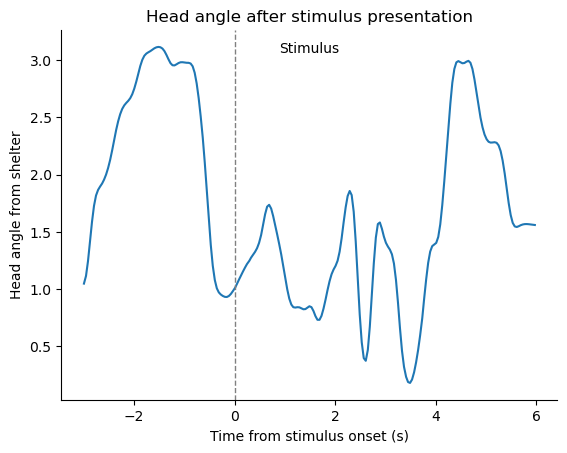

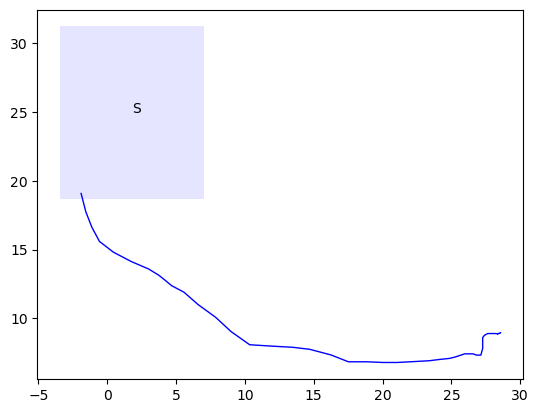

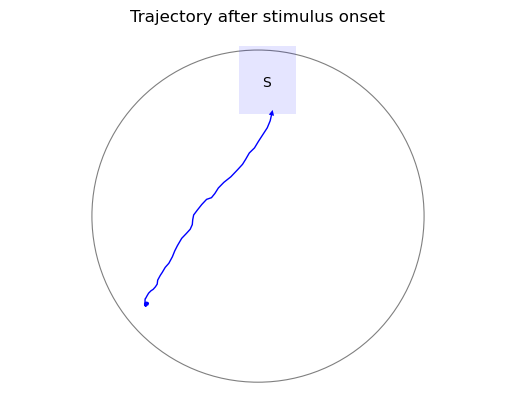

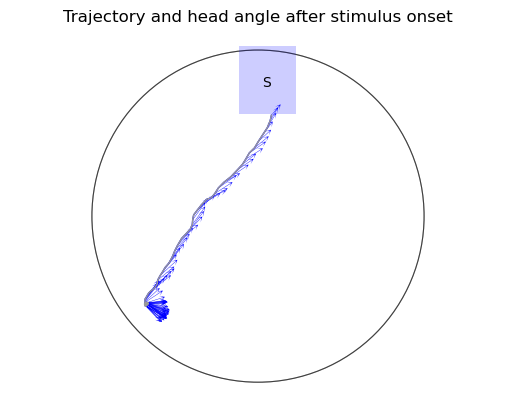

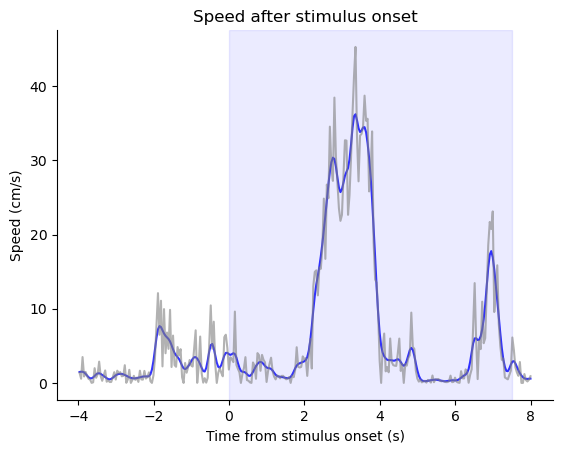

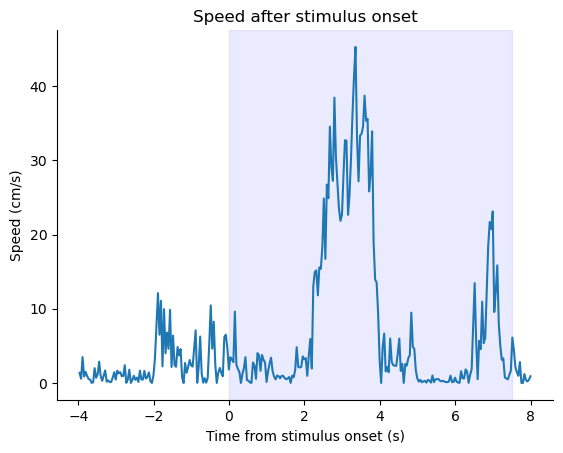

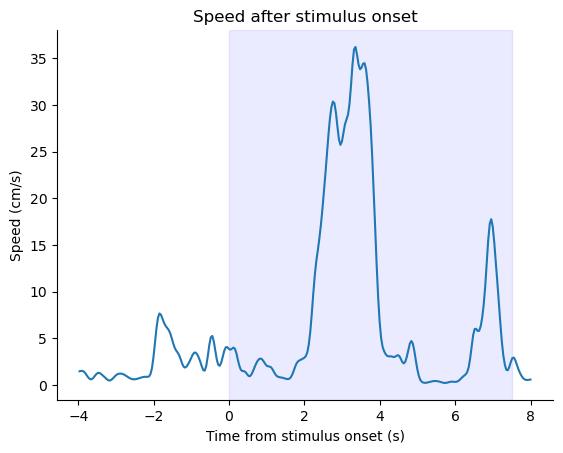

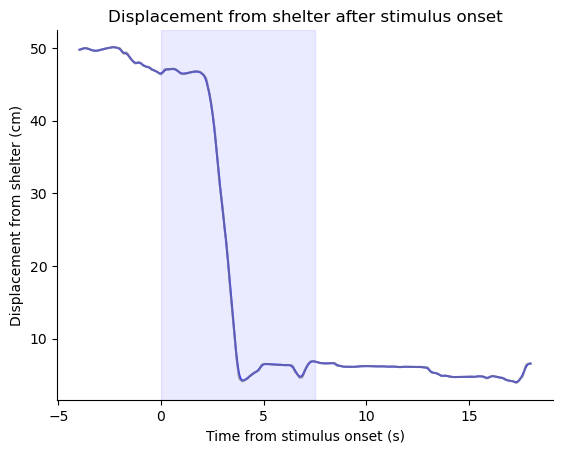

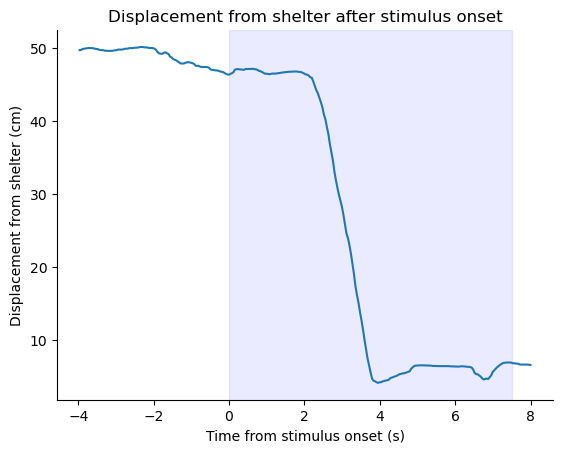

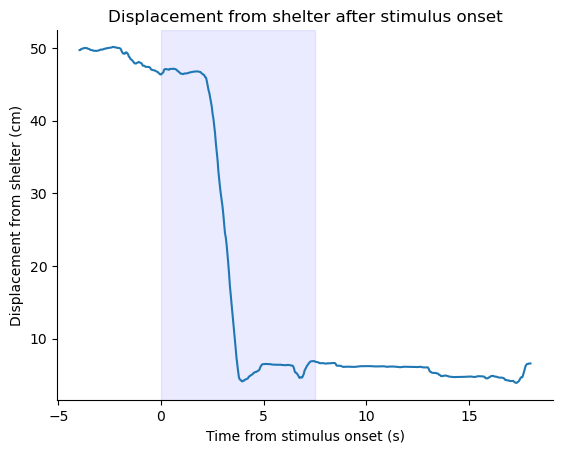

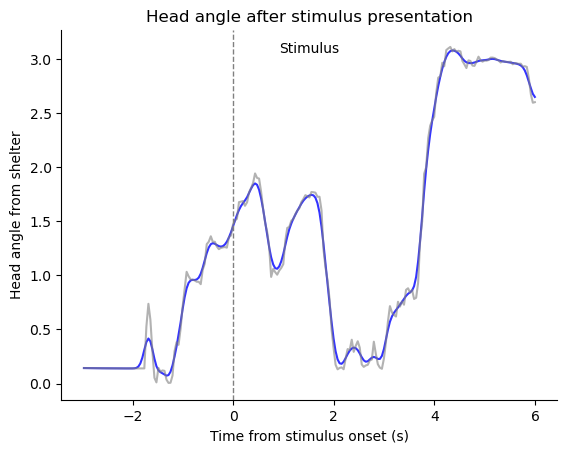

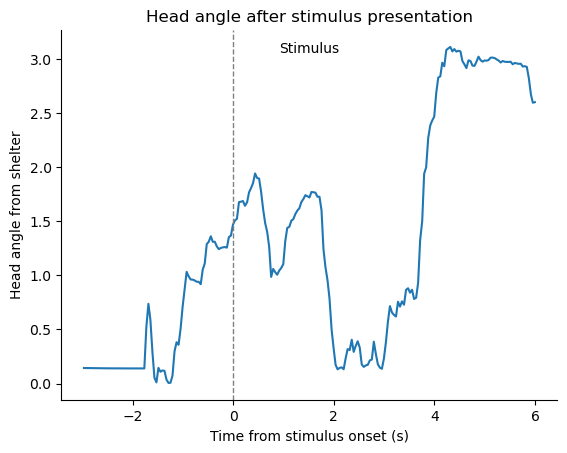

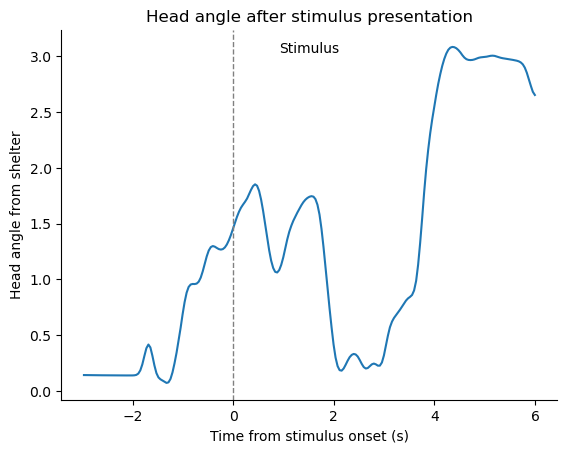

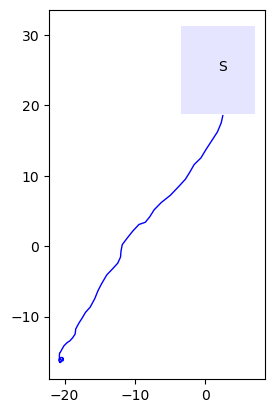

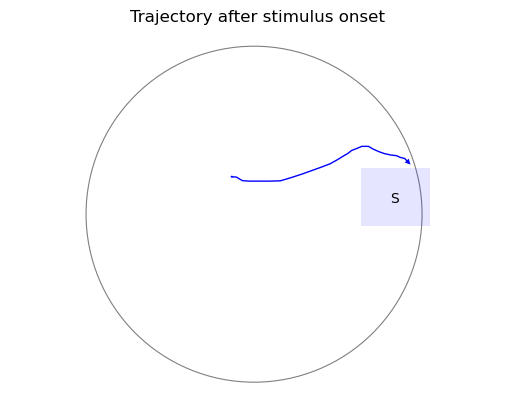

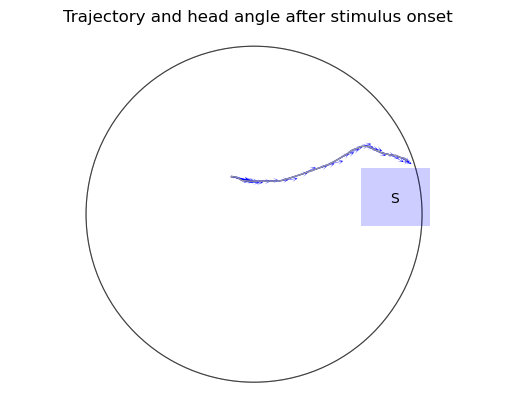

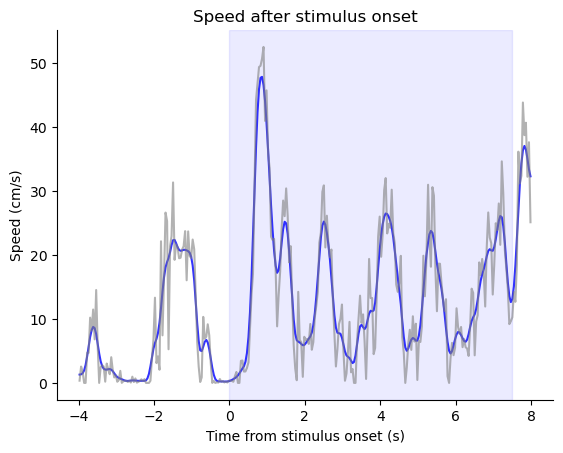

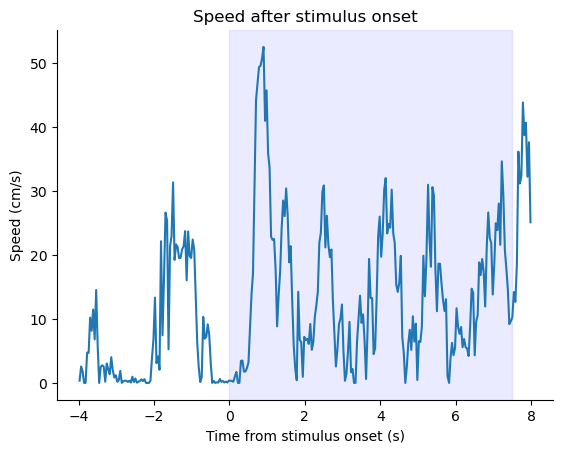

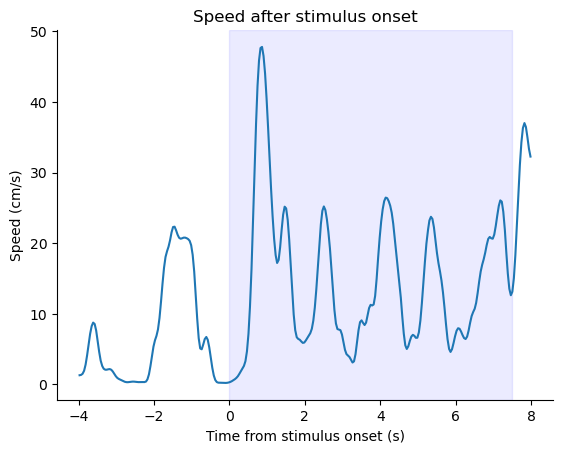

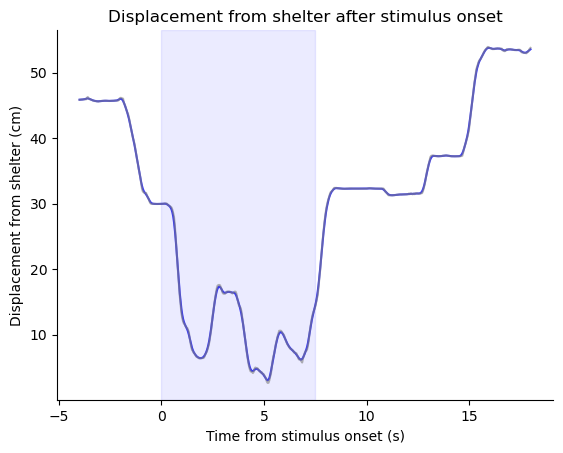

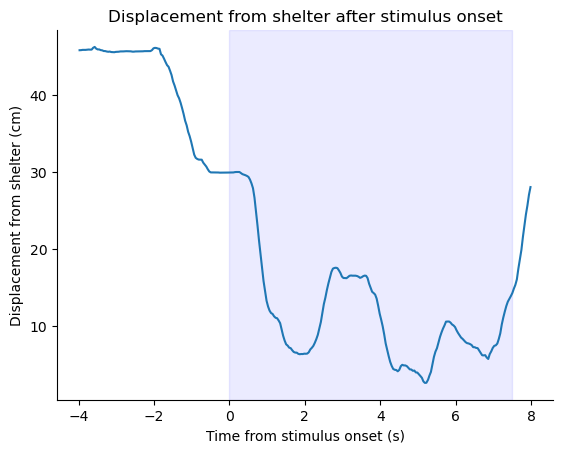

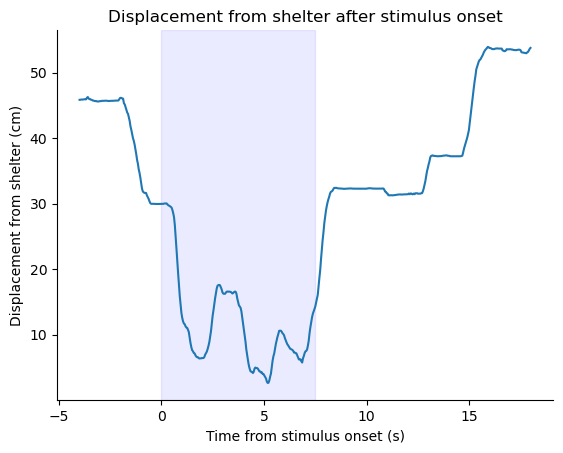

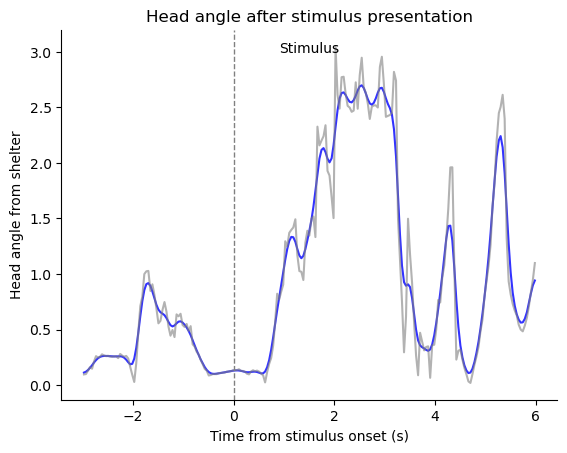

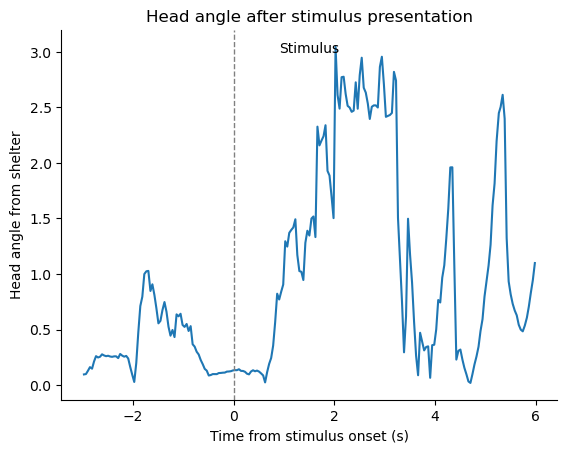

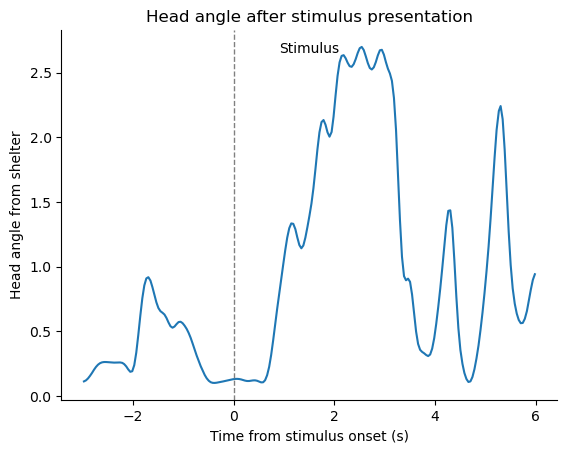

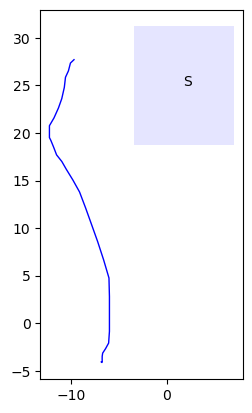

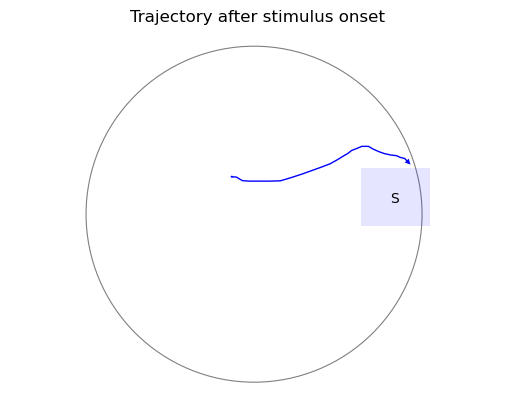

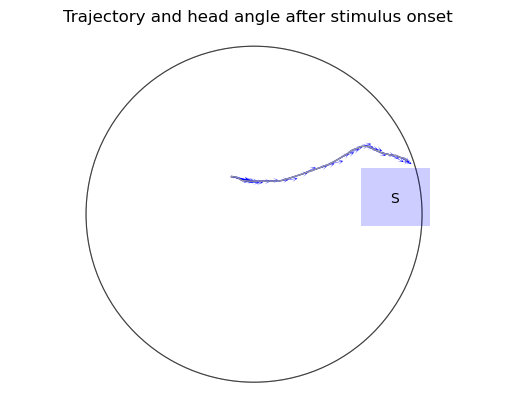

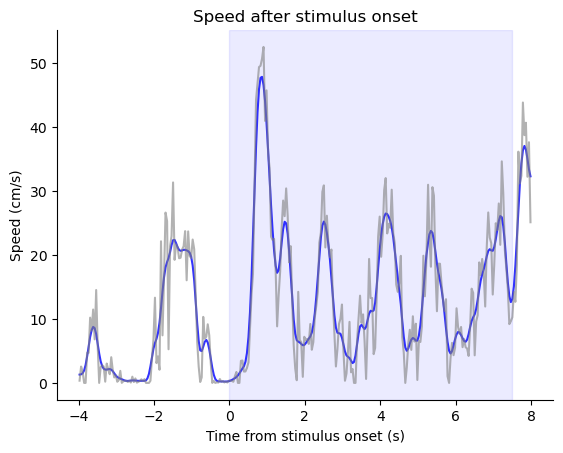

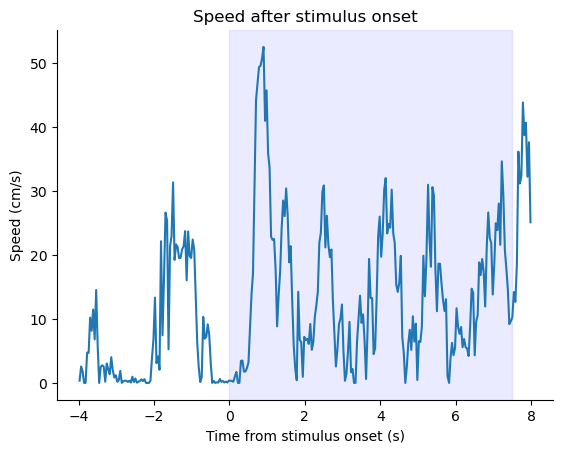

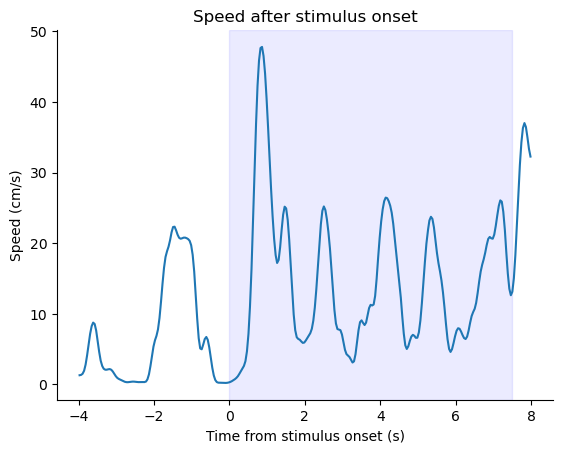

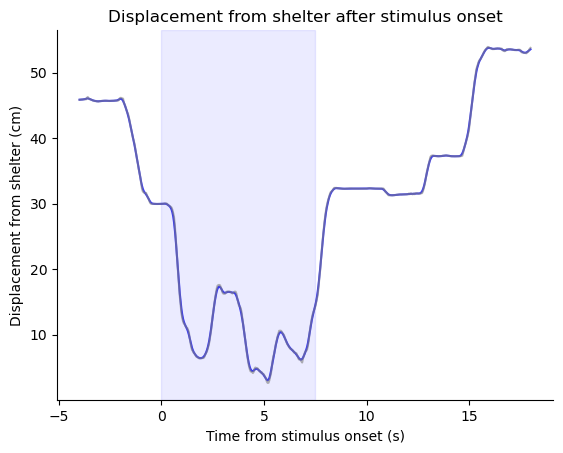

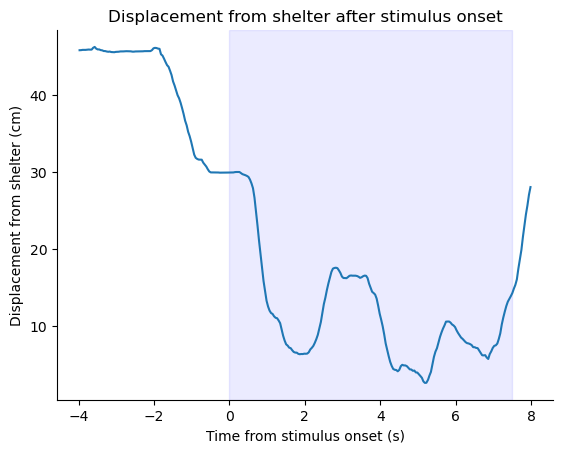

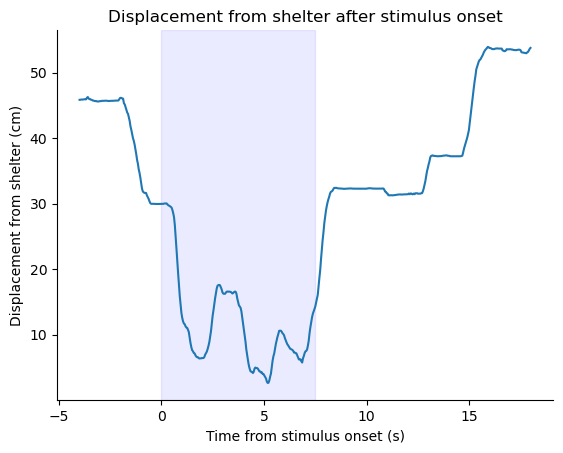

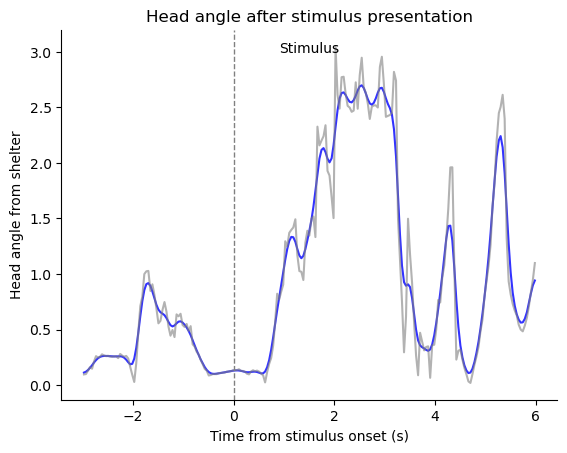

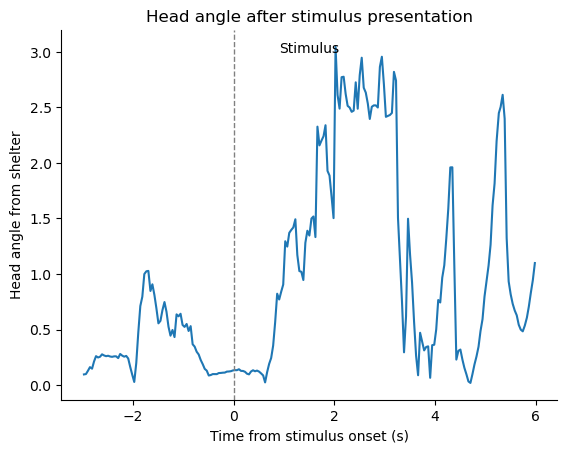

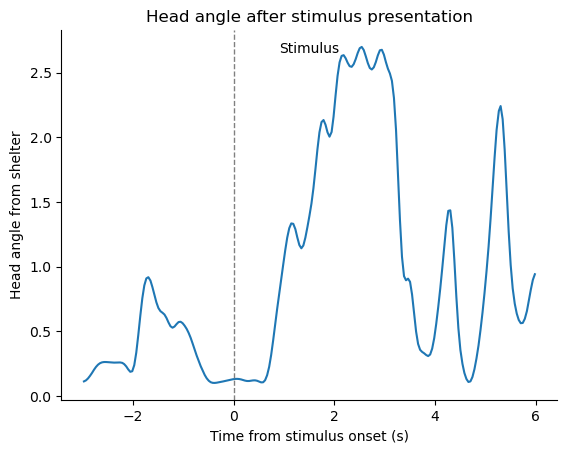

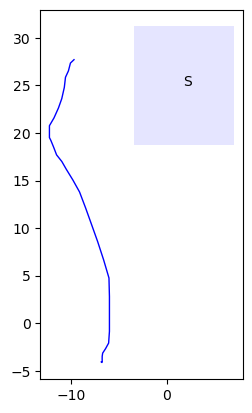

In [2]:
%run compiled_functions_recent.ipynb

%run compiled_trajectory.ipynb

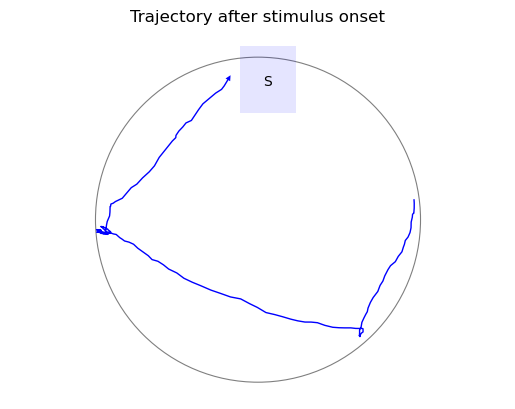

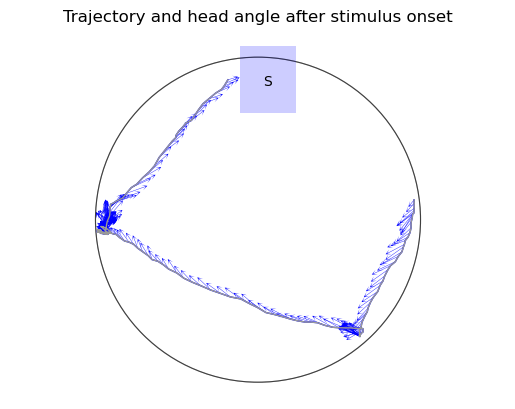

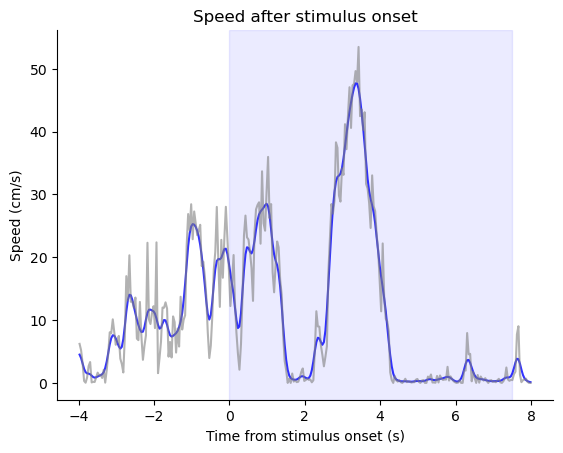

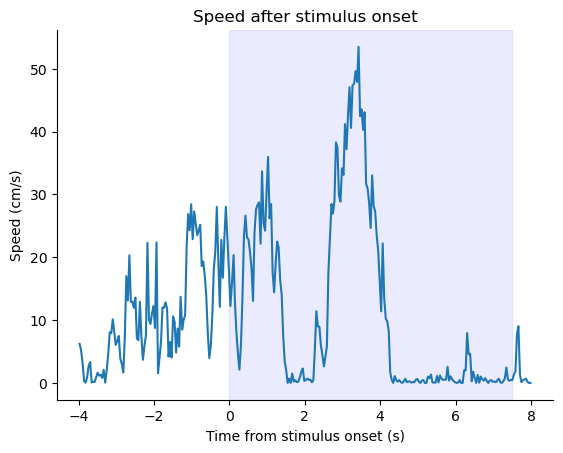

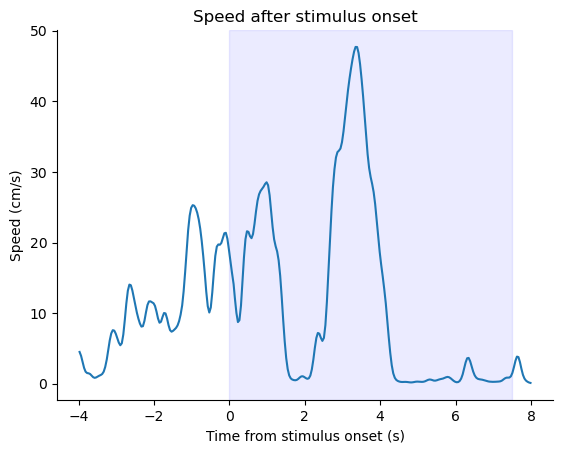

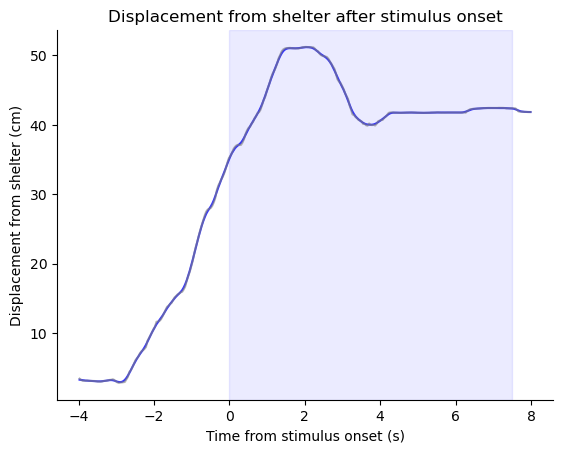

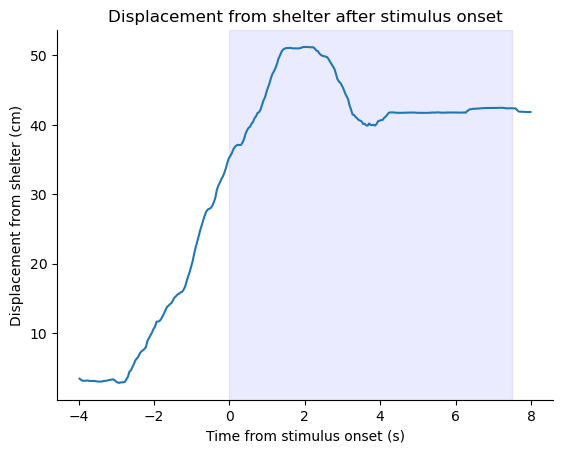

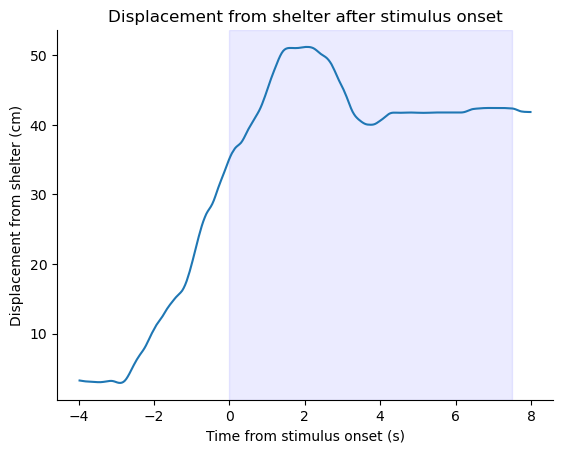

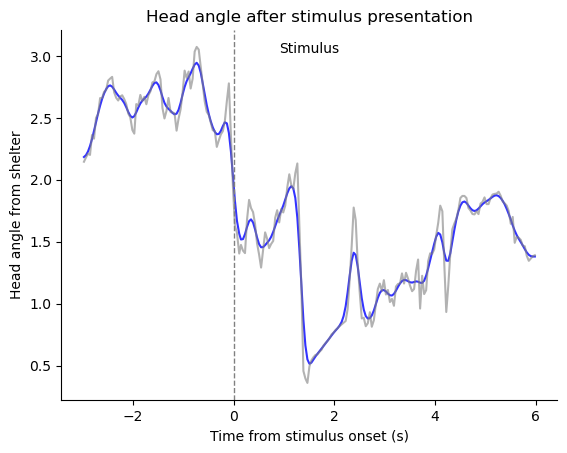

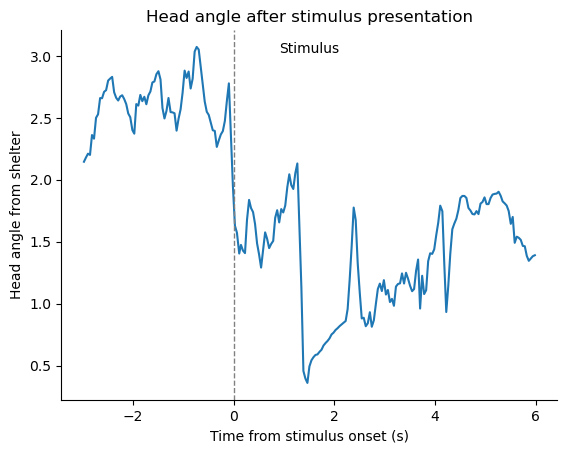

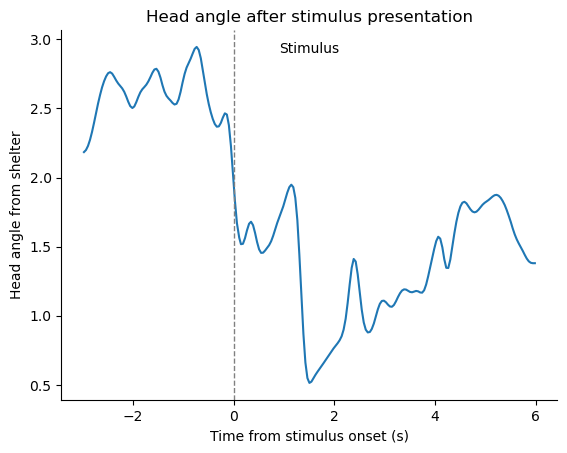

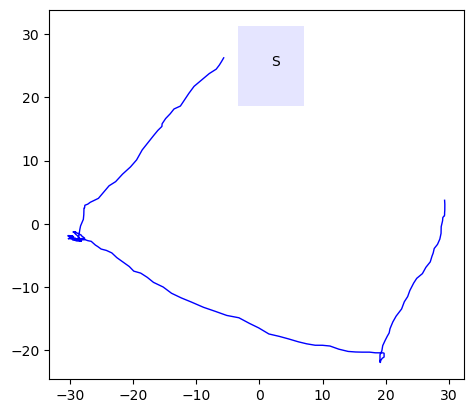

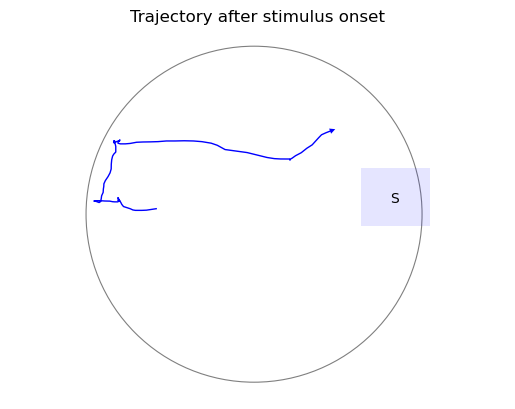

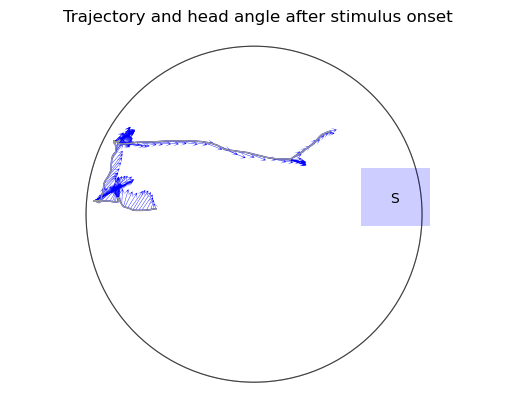

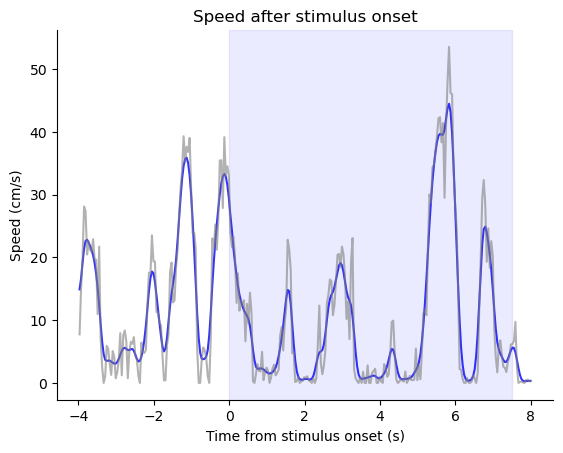

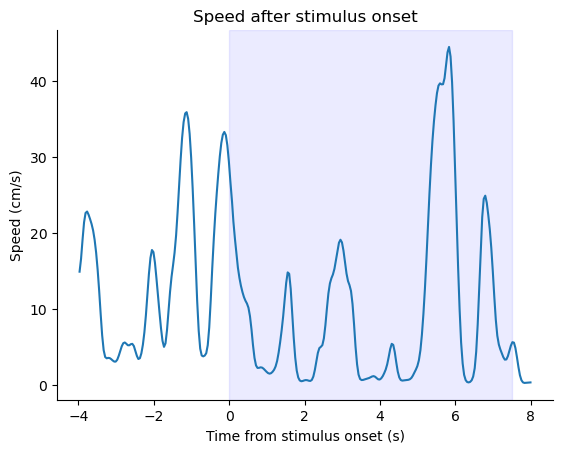

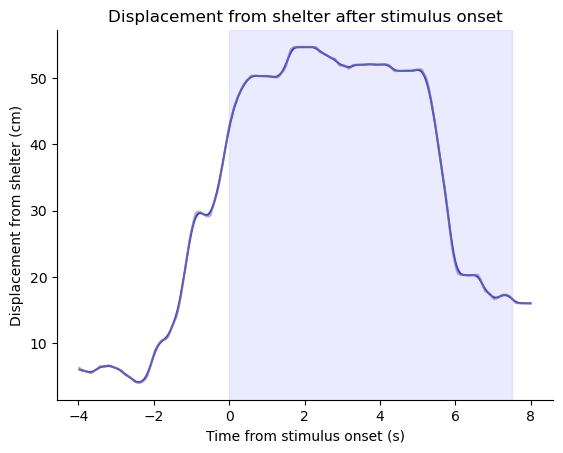

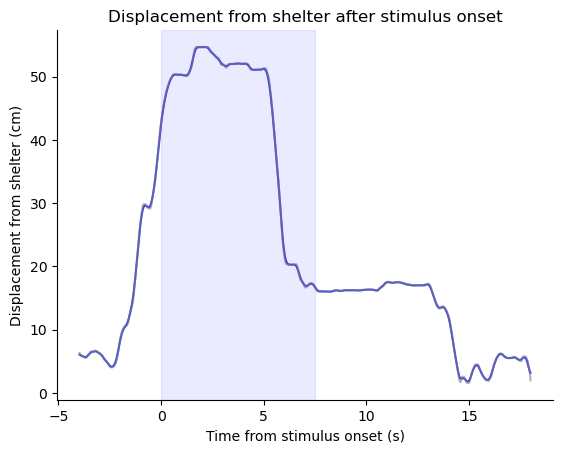

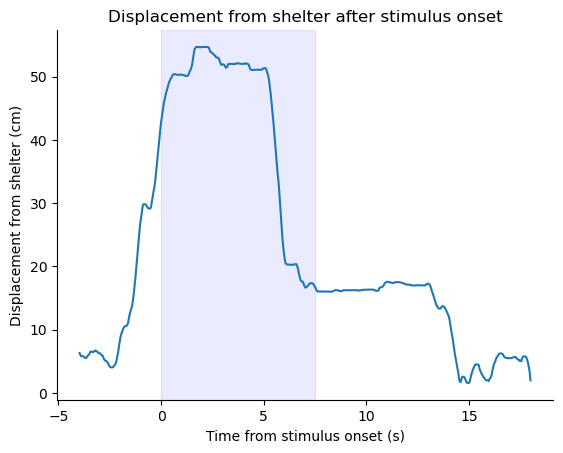

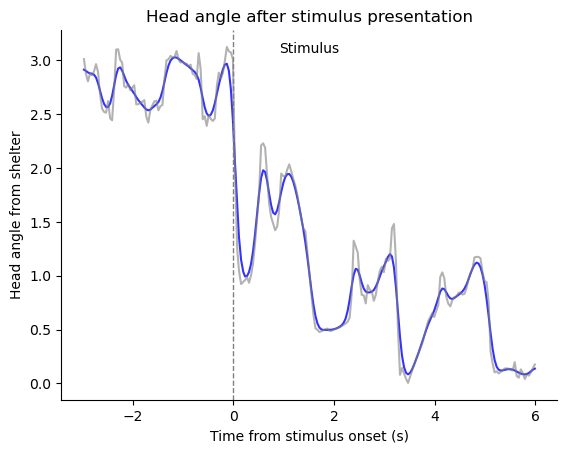

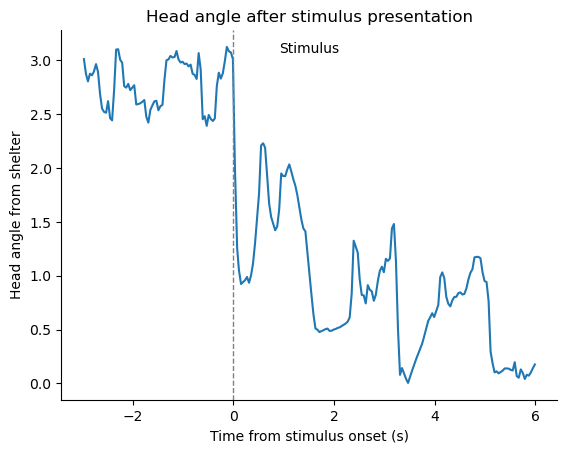

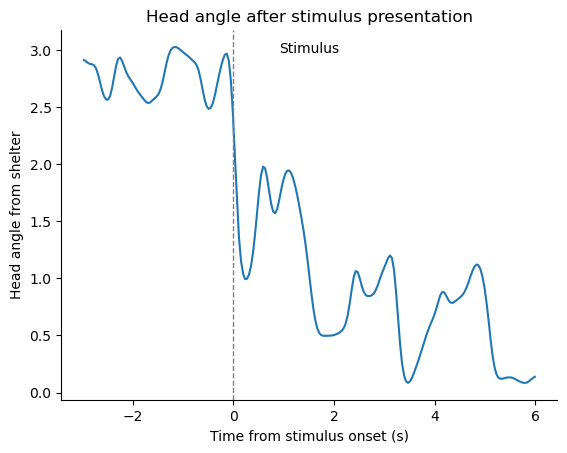

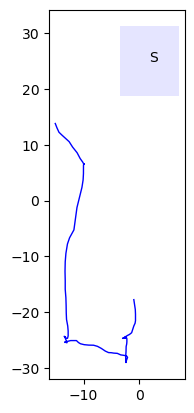

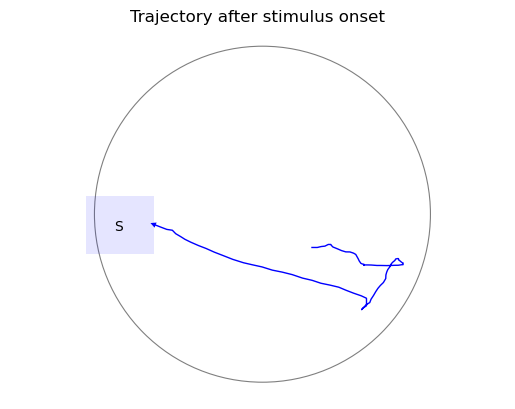

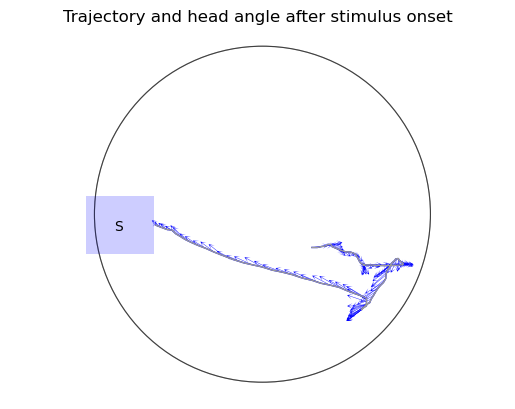

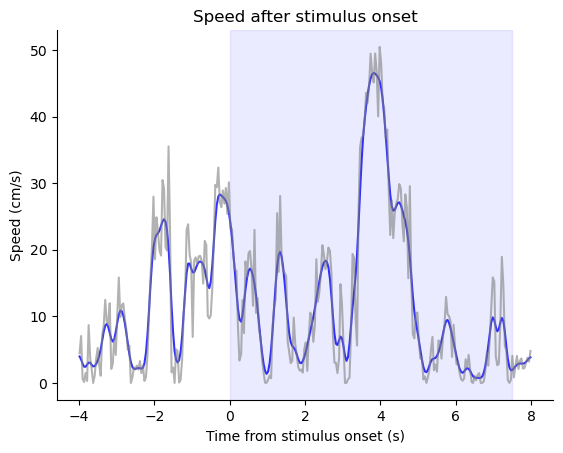

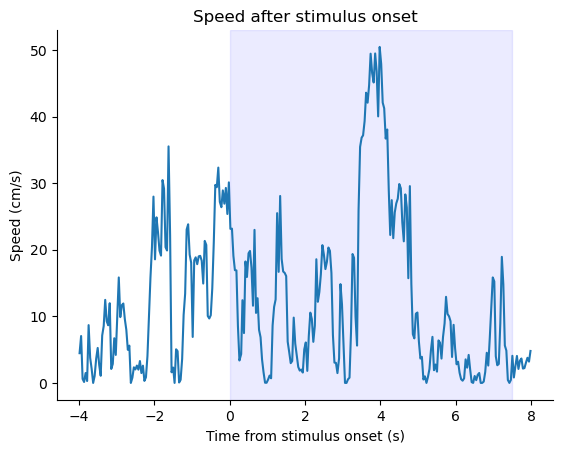

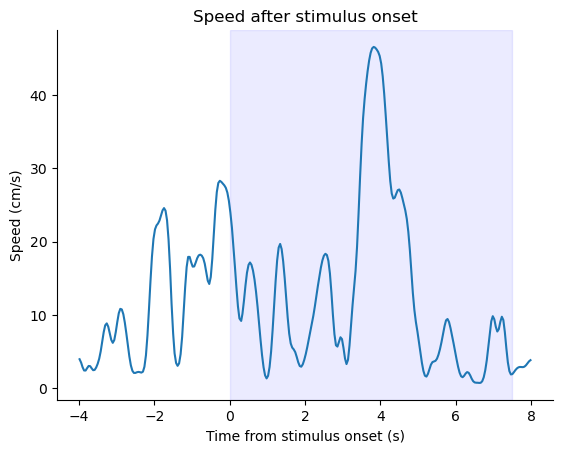

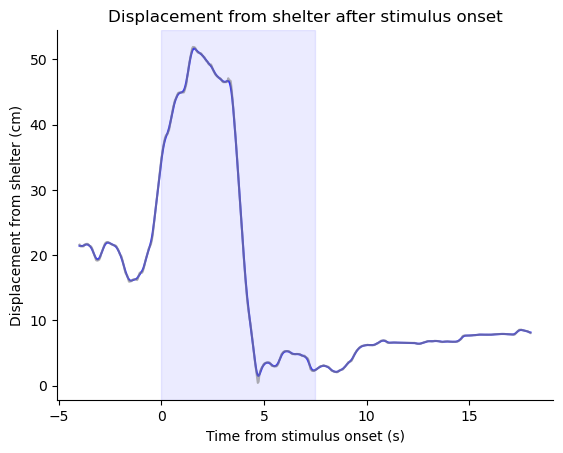

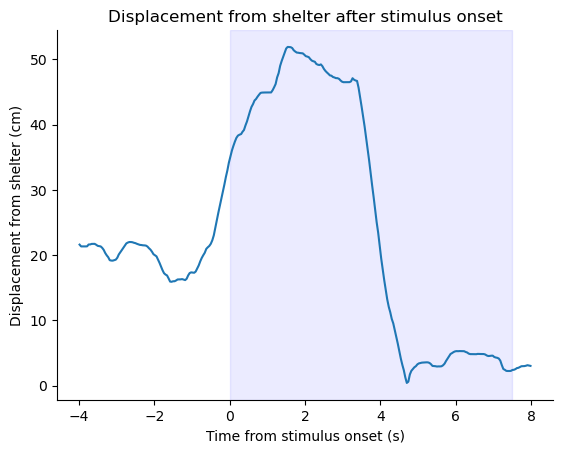

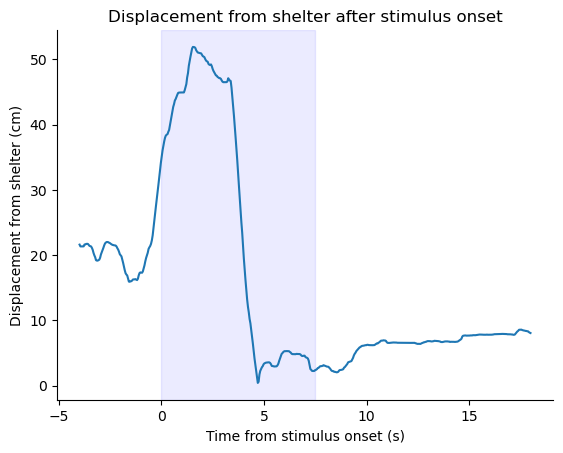

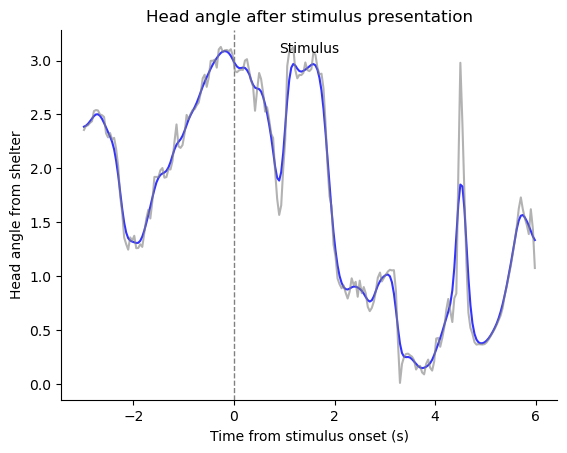

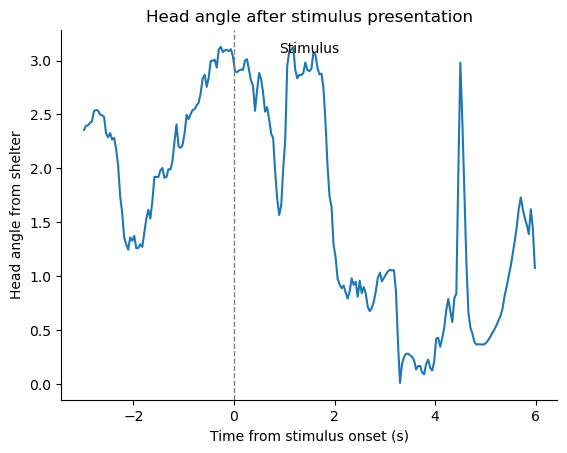

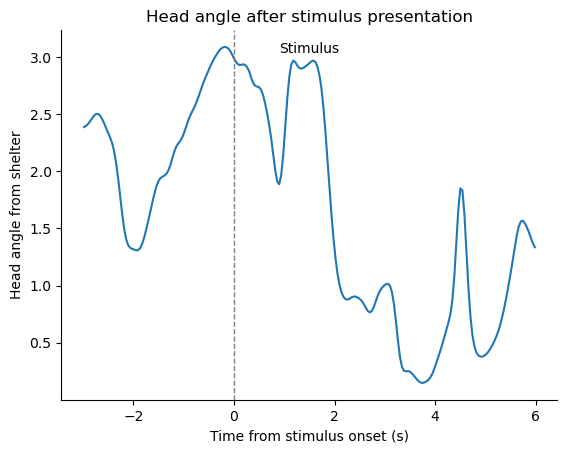

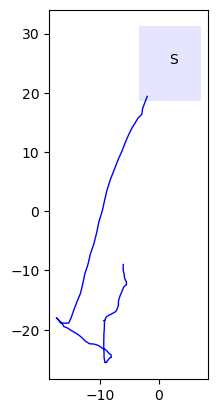

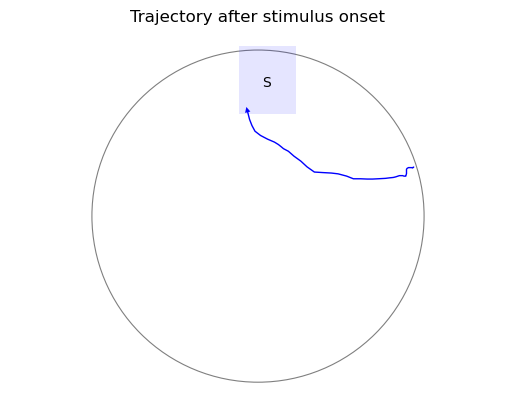

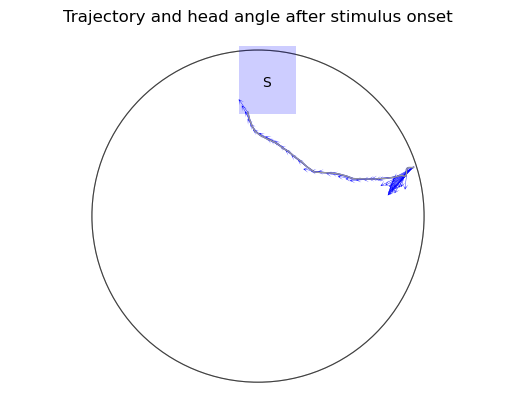

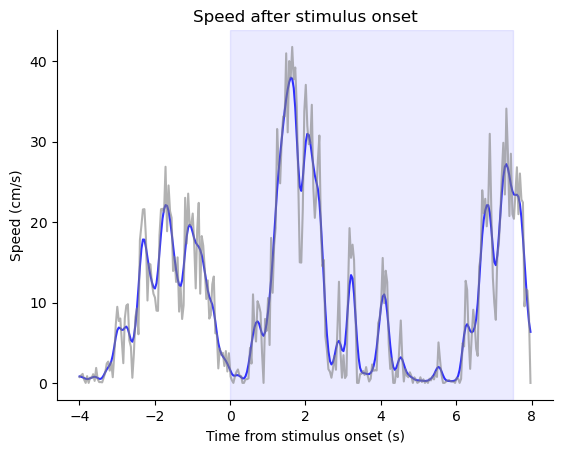

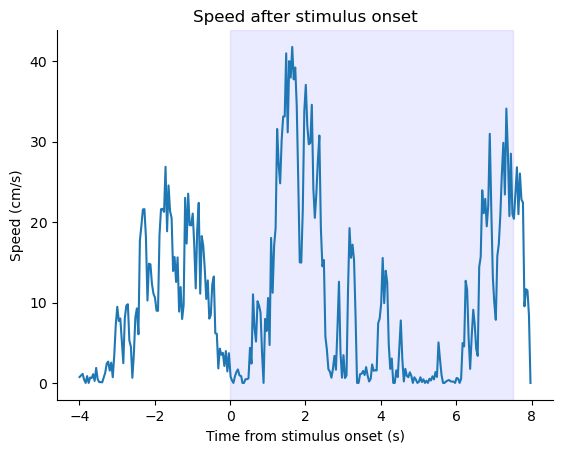

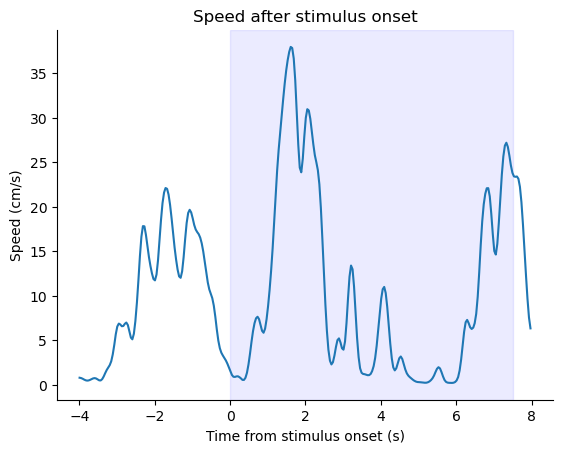

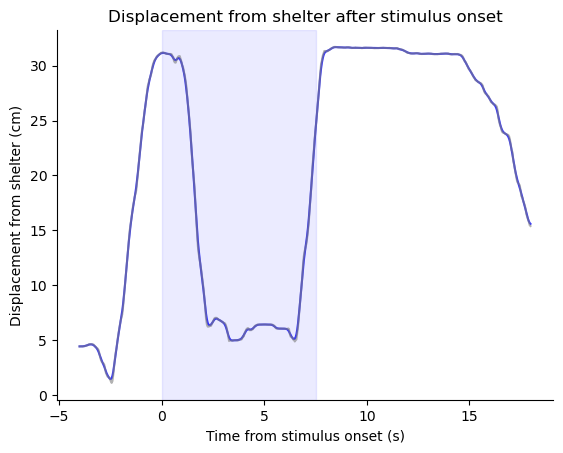

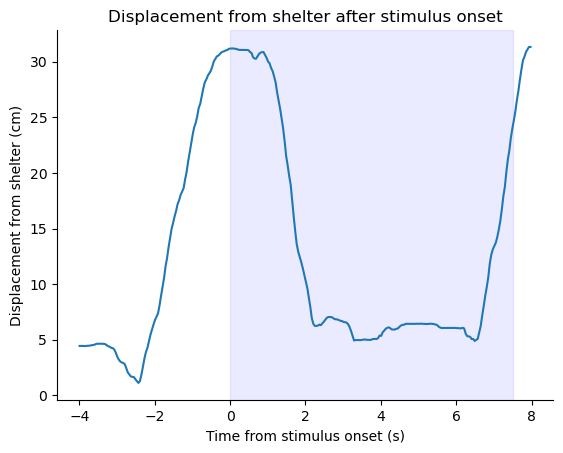

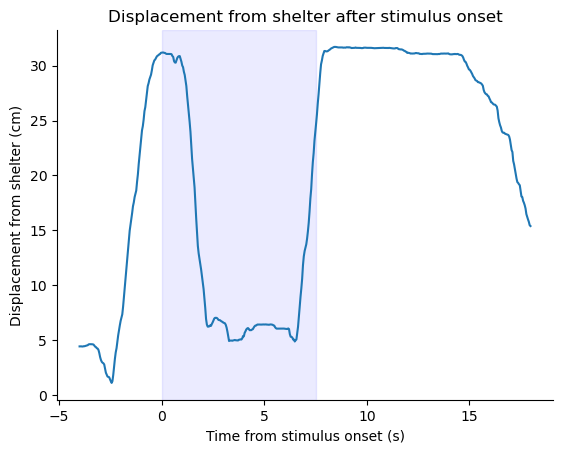

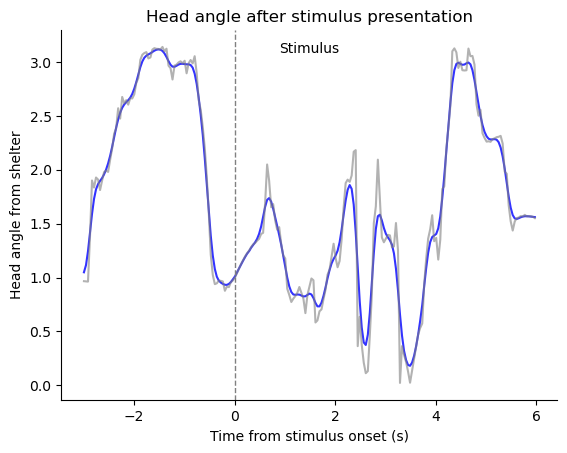

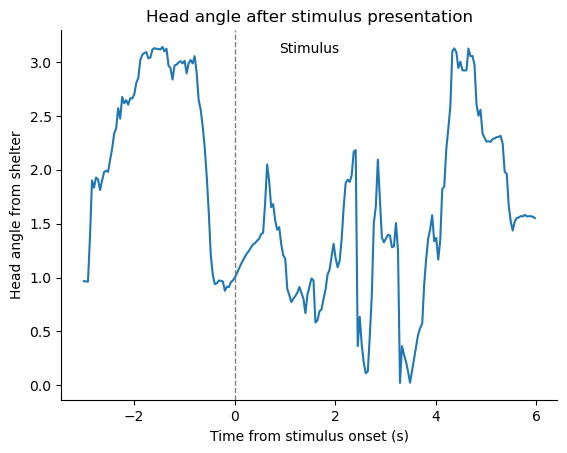

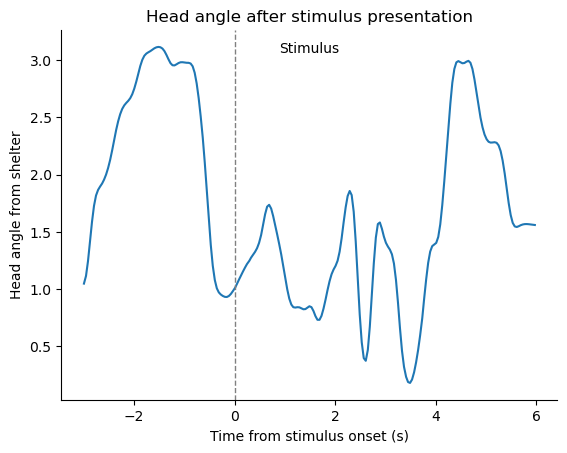

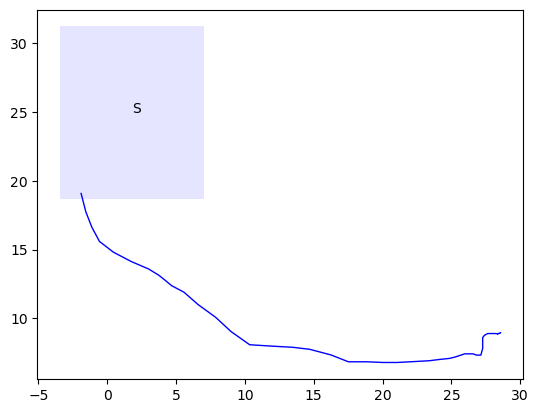

In [3]:
%run graphing_function_recent.ipynb

%run Control_1_stimulus1.ipynb
M1_coord_scaled = coord_scaled
M1_coords = coords
M1_initial_displacement = initial_displacement
M1_total_distance = total_distance
M1_shelter_x = shelter_x
M1_shelter_y = shelter_y
M1_shelter_rotate_x = shelter_rotate_x
M1_shelter_rotate_y = shelter_rotate_y
M1_rotate = rotate
M1_coord_scaled_smooth = coord_scaled_smooth

%run Control_2_stimulus1.ipynb
M2_coord_scaled = coord_scaled
M2_coords = coords
M2_initial_displacement = initial_displacement
M2_total_distance = total_distance
M2_shelter_x = shelter_x
M2_shelter_y = shelter_y
M2_shelter_rotate_x = shelter_rotate_x
M2_shelter_rotate_y = shelter_rotate_y
M2_rotate = rotate
M2_coord_scaled_smooth = coord_scaled_smooth


%run Control_3_stimulus1.ipynb
M3_coord_scaled = coord_scaled
M3_coords = coords
M3_initial_displacement = initial_displacement
M3_total_distance = total_distance
M3_shelter_x = shelter_x
M3_shelter_y = shelter_y
M3_shelter_rotate_x = shelter_rotate_x
M3_shelter_rotate_y = shelter_rotate_y
M3_rotate = rotate
M3_coord_scaled_smooth = coord_scaled_smooth


%run Control_4_stimulus1.ipynb
M4_coord_scaled = coord_scaled
M4_coords = coords
M4_initial_displacement = initial_displacement
M4_total_distance = total_distance
M4_shelter_x = shelter_x
M4_shelter_y = shelter_y
M4_shelter_rotate_x = shelter_rotate_x
M4_shelter_rotate_y = shelter_rotate_y
M4_rotate = rotate
M4_coord_scaled_smooth = coord_scaled_smooth


In [4]:
n=4

In [5]:
def compile_parameters():
    plt.figure()
    ax=plt.axes()

    x = displacement_inter_six['time']
    y = displacement_inter_six['average']
    y_up = displacement_inter_six['SEM_up']
    y_down = displacement_inter_six['SEM_down']

    ax.plot(x,y, label = 'displacement')
    ax.plot(x,y_up, color = 'none')
    ax.plot(x,y_down, color = 'none')
    plt.fill_between(x,y_up, y_down, color = 'blue', alpha = .05)
    ax.set_xlabel('Time from stimulus onset (s)')
    ax.set_ylabel('Normalized values') #convert to cm - cm/s
    ax.set_title('Average displacement, speed, and head angle after stimulus onset')
    plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

    xs = speed_inter_six['time']
    ys = speed_inter_six['average']
    y_ups = speed_inter_six['SEM_up']
    y_downs = speed_inter_six['SEM_down']

    ax.plot(xs,ys, color='red', label = 'speed')
    ax.plot(xs,y_ups, color = 'none')
    ax.plot(xs,y_downs, color = 'none')
    plt.fill_between(xs,y_ups, y_downs, color = 'red', alpha = .05)

    xa = angle_inter_six['time']
    ya = angle_inter_six['average']
    y_upa = angle_inter_six['SEM_up']
    y_downa = angle_inter_six['SEM_down']

    ax.plot(xa,ya, color='green', label = 'head angle')
    ax.plot(xa,y_upa, color = 'none')
    ax.plot(xa,y_downa, color = 'none')
    plt.fill_between(xa,y_upa, y_downa, color = 'green', alpha = .05)

    plt.legend(loc = 'upper right')
    return plt

In [6]:
def plot_linearity_ratio(n):
    plt.figure()
    ax = plt.axes()
    
    max_x = float('-inf')
    min_x = float('inf')


    for i in range(1, n+1):
        x_data = globals()[f'M{i}_initial_displacement']
        y_data = globals()[f'M{i}_total_distance']
        ax.scatter(x_data, y_data)
        
        # Update min and max values for x and y data
        max_x = max(max_x, x_data.max())
        min_x = min(min_x, x_data.min())
    
    # Plot y=x line based on x_data range
    ax.plot([min_x, max_x], [min_x, max_x], color='gray', linestyle='--', linewidth=1)
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.yaxis.set_major_locator(plt.MultipleLocator(10))
    
    ax.set_ylabel('Total distance traveled (cm)') #convert to cm - cm/s
    ax.set_title('Initial displacement from shelter (cm)')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
            
    return plt

In [ ]:
#input mice number, start, stop, step, column, dataframe

#interpolated coord_scaled
displacement_inter_6 = interpolate_all(4, -3, 6, .04, 'displacement', 'coord_scaled')
speed_inter_6 = interpolate_all(4, -3, 6, .04, 'speed', 'coord_scaled')
angle_inter_6 = interpolate_all(4, -3, 6, .04, 'head_angle', 'coord_scaled')

#interpolated coord_scaled_smooth
displacement_inter_6_smooth = interpolate_all(4, -3, 6, .04, 'displacement', 'coord_scaled_smooth')
speed_inter_6_smooth = interpolate_all(4, -3, 6, .04, 'speed', 'coord_scaled_smooth')
angle_inter_6_smooth = interpolate_all(4, -3, 6, .04, 'head_angle', 'coord_scaled_smooth')


#normalized versions:
displacement_inter_6_norm = normalize_all(displacement_inter_6)
speed_inter_6_norm = normalize_all(speed_inter_6)
angle_inter_6_norm = normalize_all(angle_inter_6)


displacement_inter_6_smooth_norm = normalize_all(displacement_inter_6_smooth)
speed_inter_6_smooth_norm = normalize_all(speed_inter_6_smooth)
angle_inter_6_smooth_norm = normalize_all(angle_inter_6_smooth)

In [39]:
displacement_inter_6

M1_        M2_        M3_       M4_  time
0     2.888405   6.235343  19.610673  3.467929 -3.00
1     2.850047   6.198645  19.885574  3.250230 -2.96
2     2.822839   6.052258  20.293774  3.065102 -2.92
3     2.863893   5.917704  20.630047  2.965145 -2.88
4     2.877133   5.811334  20.976942  2.910352 -2.84
..         ...        ...        ...       ...   ...
220  41.776450  29.723572   4.331661  6.061992  5.80
221  41.775343  27.668992   4.695068  6.061249  5.84
222  41.780283  25.824842   4.937135  6.059456  5.88
223  41.782048  24.098851   5.082908  6.060420  5.92
224  41.776837  22.815775   5.214526  6.060784  5.96

[225 rows x 5 columns]

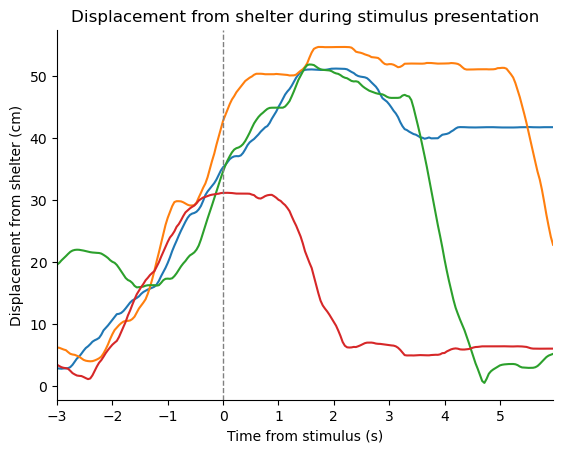

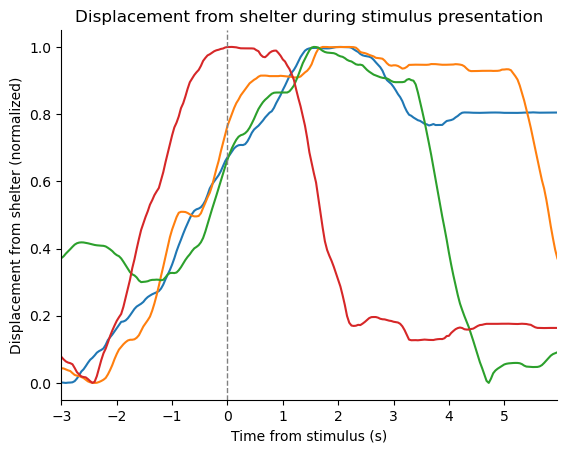

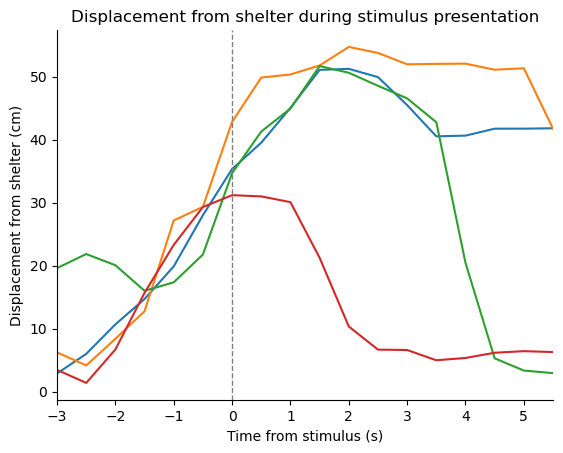

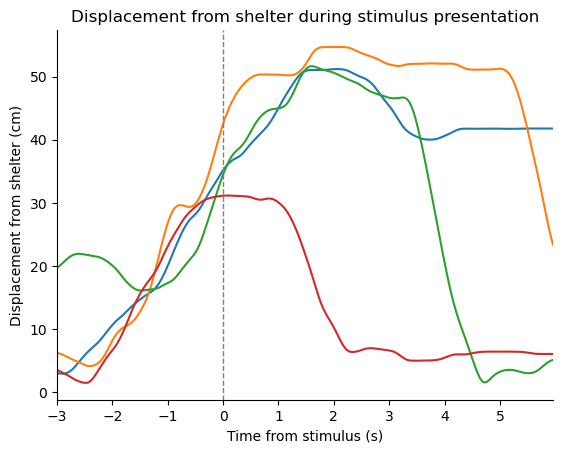

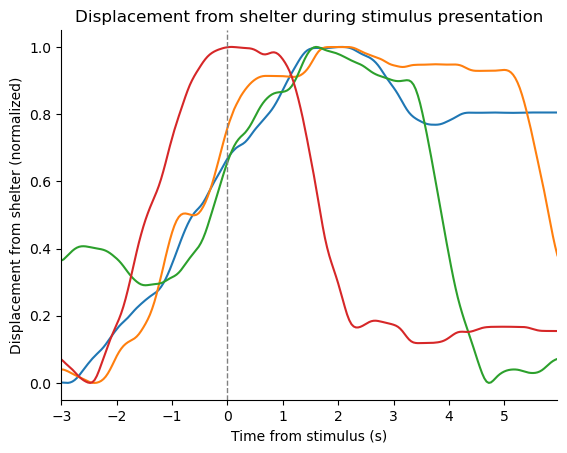

In [23]:
plot_all_displacement(n, -3,6, .04, 'displacement', 'coord_scaled', False)
plot_all_displacement(n, -3, 6, .04, 'displacement', 'coord_scaled', True)

plot_all_displacement(n, -3,6, .5, 'displacement', 'coord_scaled', False)

plot_all_displacement(n, -3,6, .04, 'displacement', 'coord_scaled_smooth', False)
plot_all_displacement(n, -3, 6, .04, 'displacement', 'coord_scaled_smooth', True)

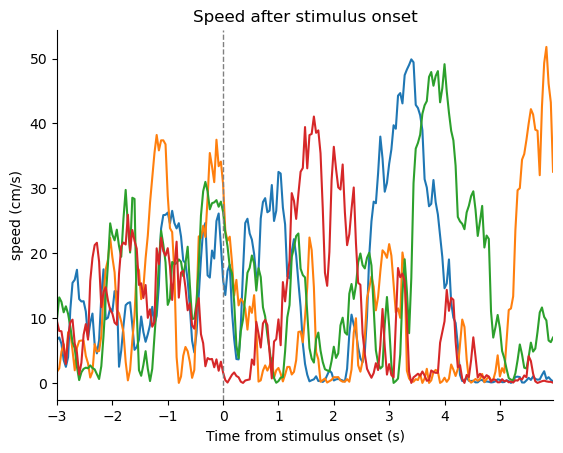

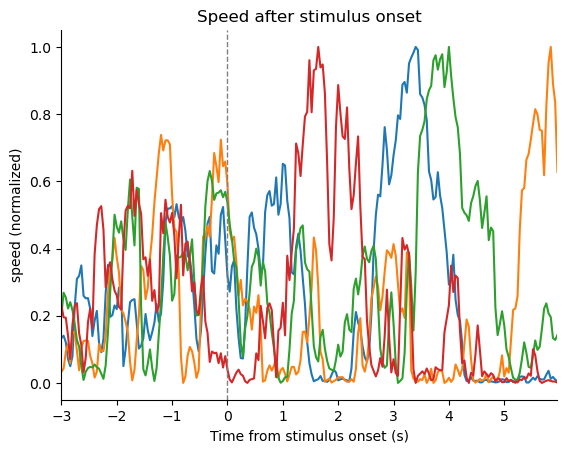

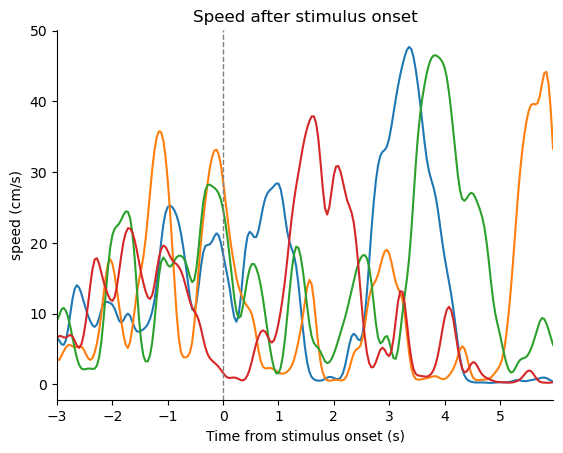

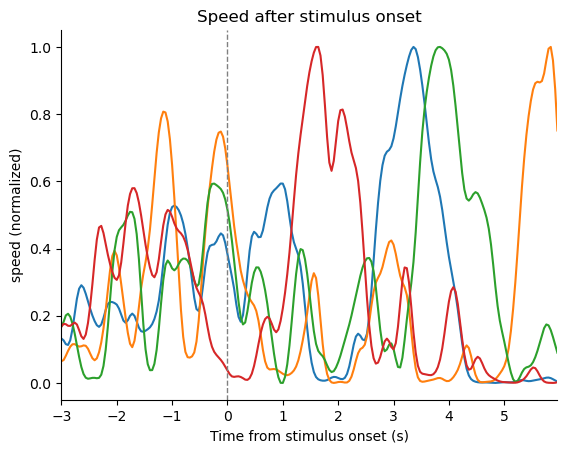

NameError: name 'stop' is not defined

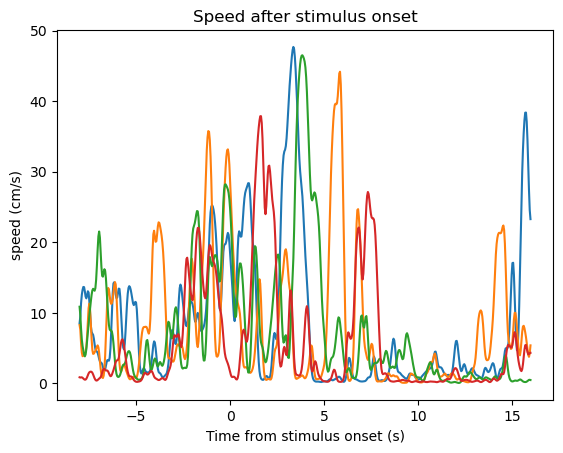

In [49]:
plot_all_speed(n, -3, 6, .04, 'speed', 'coord_scaled', False)
plot_all_speed(n, -3, 6, .04, 'speed', 'coord_scaled', True)

plot_all_speed(n, -3, 6, .04, 'speed', 'coord_scaled_smooth', False)
plot_all_speed(n, -3, 6, .04, 'speed', 'coord_scaled_smooth', True)

plot_all_speed(n, -8, 16, .04, 'speed', 'coord_scaled_smooth', False)

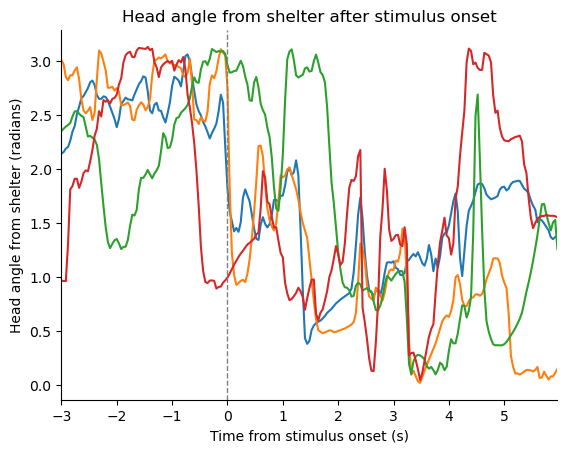

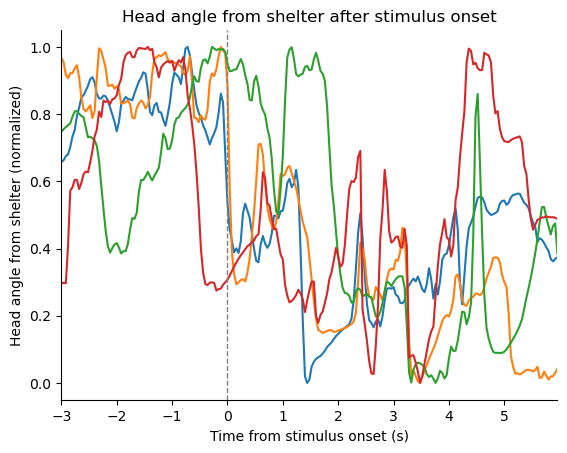

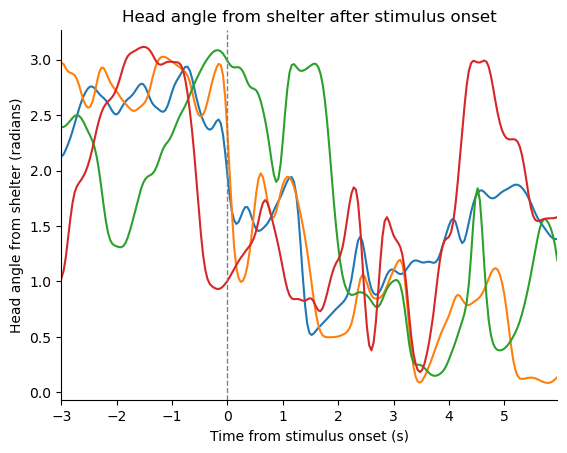

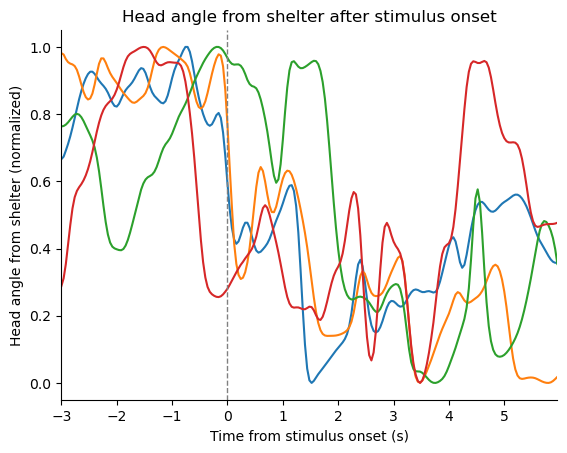

In [30]:
plot_all_angle(n, -3, 6, .04, 'head_angle', 'coord_scaled', False)
plot_all_angle(n, -3, 6, .04, 'head_angle', 'coord_scaled', True)

plot_all_angle(n, -3, 6, .04, 'head_angle', 'coord_scaled_smooth', False)
plot_all_angle(n, -3, 6, .04, 'head_angle', 'coord_scaled_smooth', True)

In [54]:
#find mean and upper and lower limit for SEM for dataframe of choice 
#create 
def summarize_data(df):   
    df['average'] = df[mice].mean(axis = 1)
    SEM = df[mice].sem(axis = 1)
    df['SEM_up'] = df['average'] + SEM
    df['SEM_down'] = df['average'] - SEM

In [55]:
#plot average + SEM
def plot_compiled_displacement(n, start_value, stop_value, step, column, dataframe, normalized):
    plt.figure()
    ax = plt.axes()
    mice = mouse_columns(n, '')
    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()
    
    df = interpolate_all(n, start_value, stop_value, step, column, dataframe, normalized)
    summarize_data(df)
    
    x = df['time']
    y = df['average']
    y_up = df['SEM_up']
    y_down = df['SEM_down']

    ax.plot(x,y)
    ax.plot(x,y_up, color = 'none')
    ax.plot(x,y_down, color = 'none')
    plt.fill_between(x,y_up, y_down, color = 'blue', alpha = .05)
    ax.set_xlabel('Time from stimulus onset (s)')
    
    if normalized:
        ax.set_ylabel('Displacement from shelter (normalized)') #convert to cm - cm/s
    else:
        ax.set_ylabel('Displacement from shelter (cm)') #convert to cm - cm/s
        
    ax.set_title('Average displacement from shelter after stimulus onset')

    if stop_value<7.5:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, 7.5, color = 'b', alpha =.08)
    
    plt.xlim(min(x), max(x))

    # Remove the box
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

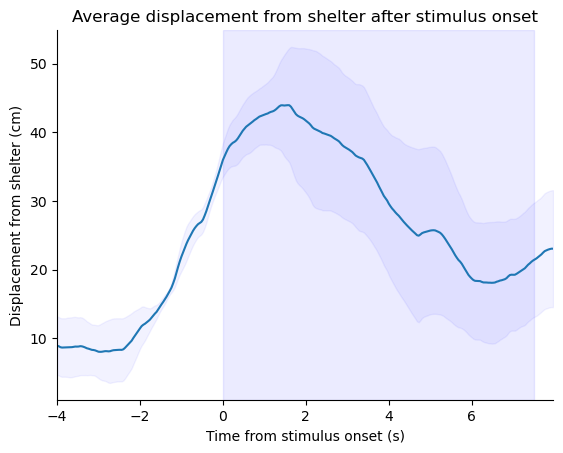

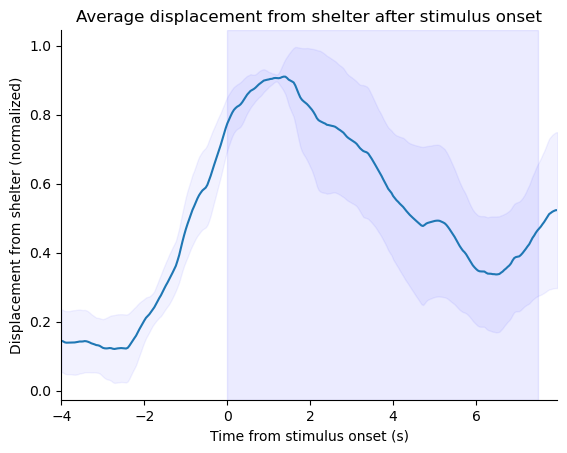

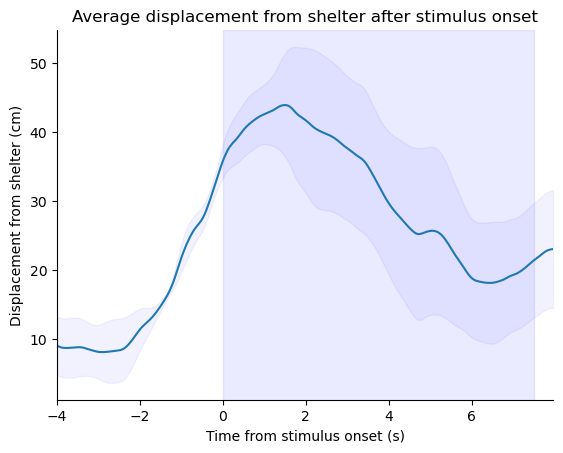

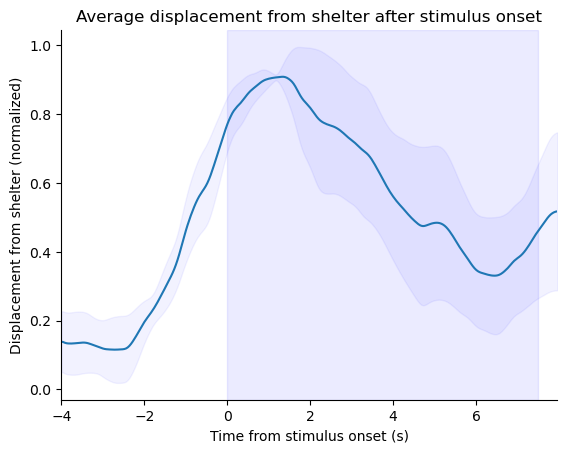

In [56]:
plot_compiled_displacement(n, -4, 8, .04, 'displacement', 'coord_scaled', False)
plot_compiled_displacement(n, -4, 8, .04, 'displacement', 'coord_scaled', True)

plot_compiled_displacement(n, -4, 8, .04, 'displacement', 'coord_scaled_smooth', False)
plot_compiled_displacement(n, -4, 8, .04, 'displacement', 'coord_scaled_smooth', True)

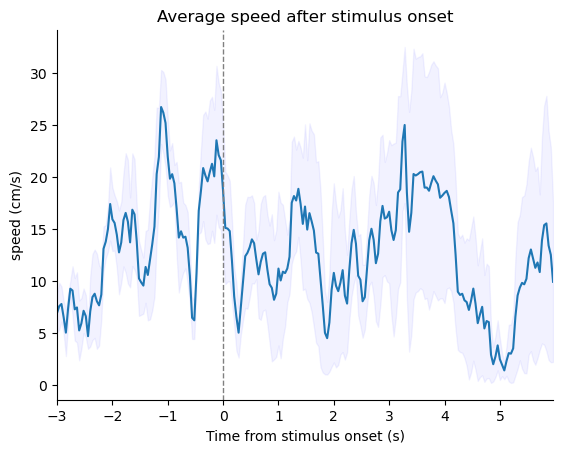

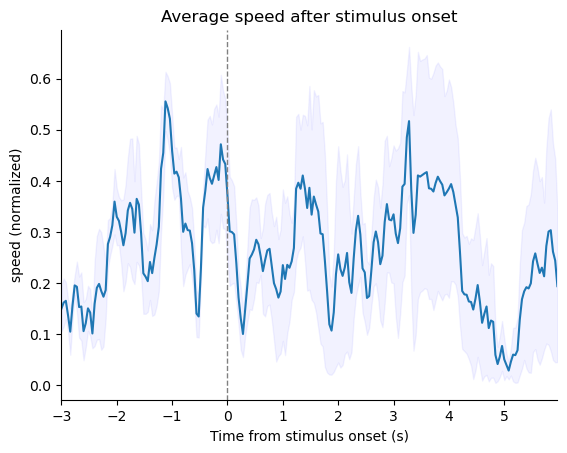

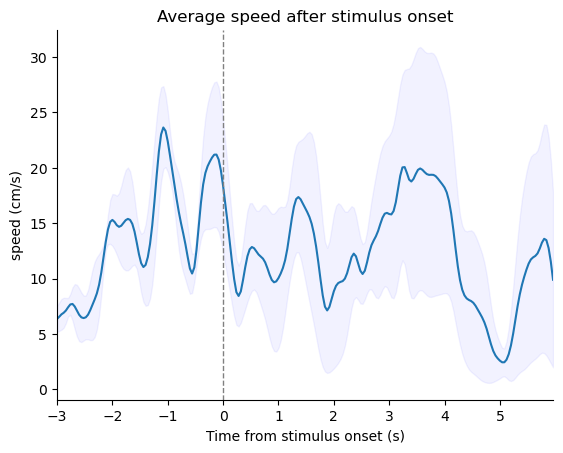

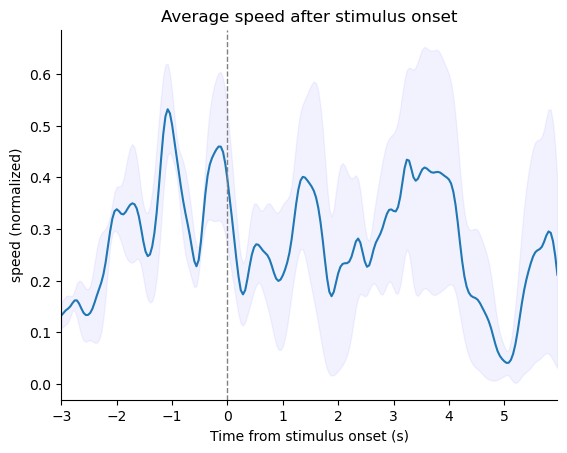

In [61]:
#plot average + SEM for speed
def plot_compiled_speed(n, start_value, stop_value, step, column, dataframe, normalized):
    plt.figure()
    ax = plt.axes()
    mice = mouse_columns(n, '')

    df = interpolate_all(n, start_value, stop_value, step, column, dataframe, normalized)
    summarize_data(df)
    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    x = df['time']
    y = df['average']
    y_up = df['SEM_up']
    y_down = df['SEM_down']

    ax.plot(x,y)
    ax.plot(x,y_up, color = 'none')
    ax.plot(x,y_down, color = 'none')
    plt.fill_between(x,y_up, y_down, color = 'blue', alpha = .05)
    ax.set_xlabel('Time from stimulus onset (s)')
    if normalized:
        ax.set_ylabel('speed (normalized)') #convert to cm - cm/s
    else:
        ax.set_ylabel('speed (cm/s)') #convert to cm - cm/s
    
    ax.set_title('Average speed after stimulus onset')

    if stop_value<7.5:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, 7.5, color = 'b', alpha =.08)
        
    plt.xlim(min(x), max(x))

    # Remove the box
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()
    
    
plot_compiled_speed(n, -3, 6, .04, 'speed', 'coord_scaled', False)
plot_compiled_speed(n, -3, 6, .04, 'speed', 'coord_scaled', True)

plot_compiled_speed(n, -3, 6, .04, 'speed', 'coord_scaled_smooth', False)
plot_compiled_speed(n, -3, 6, .04, 'speed', 'coord_scaled_smooth', True)

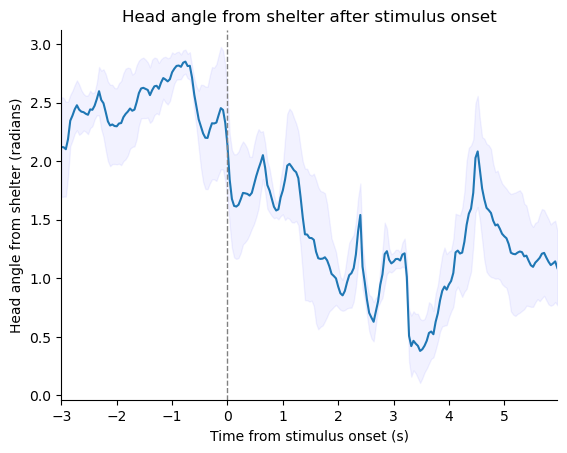

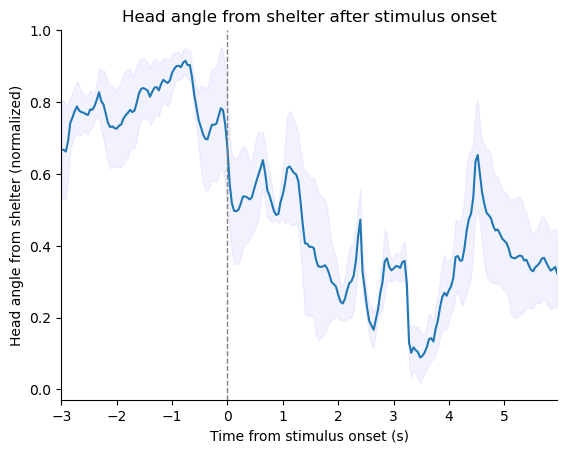

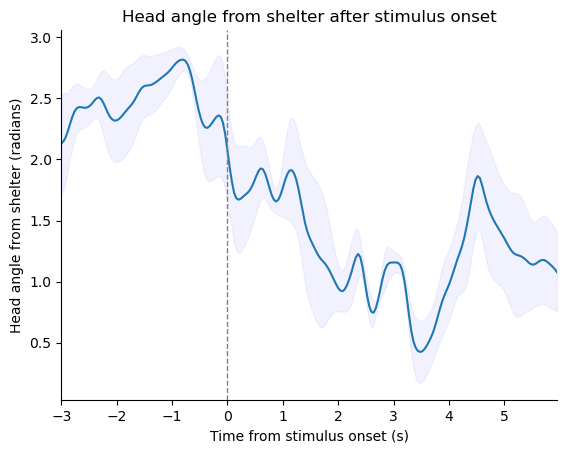

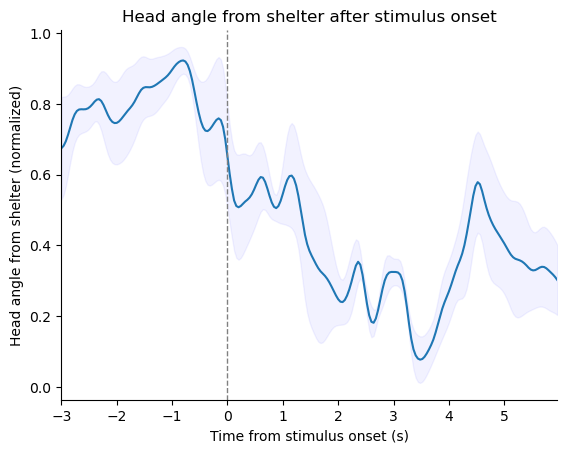

In [62]:
#plot compiled average and SEM for head angle
def plot_compiled_angle(n, start_value, stop_value, step, column, dataframe, normalized):
    plt.figure()
    ax = plt.axes()
    mice = mouse_columns(n, '')

    df = interpolate_all(n, start_value, stop_value, step, column, dataframe, normalized)
    summarize_data(df)
    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    x = df['time']
    y = df['average']
    y_up = df['SEM_up']
    y_down = df['SEM_down']

    ax.plot(x,y)
    ax.plot(x,y_up, color = 'none')
    ax.plot(x,y_down, color = 'none')
    plt.fill_between(x,y_up, y_down, color = 'blue', alpha = .05)
    ax.set_xlabel('Time from stimulus onset (s)')
    
    if normalized:
        ax.set_ylabel('Head angle from shelter (normalized)') #convert to cm - cm/s
    else:
        ax.set_ylabel('Head angle from shelter (radians)') #convert to cm - cm/s

    ax.set_title('Head angle from shelter after stimulus onset')

    if stop_value<7.5:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, 7.5, color = 'b', alpha =.08)
        
    plt.xlim(min(x), max(x))

    # Remove the box
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

plot_compiled_angle(n, -3, 6, .04, 'head_angle', 'coord_scaled', False)
plot_compiled_angle(n, -3, 6, .04, 'head_angle', 'coord_scaled', True)

plot_compiled_angle(n, -3, 6, .04, 'head_angle', 'coord_scaled_smooth', False)
plot_compiled_angle(n, -3, 6, .04, 'head_angle', 'coord_scaled_smooth', True)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

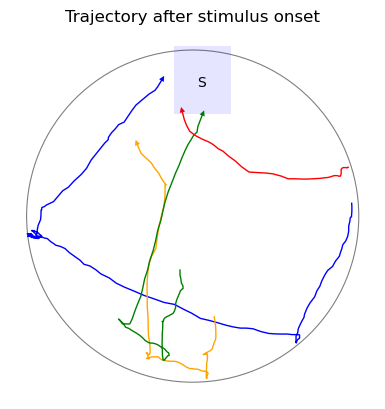

In [32]:
plot_compiled_trajectory(4)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

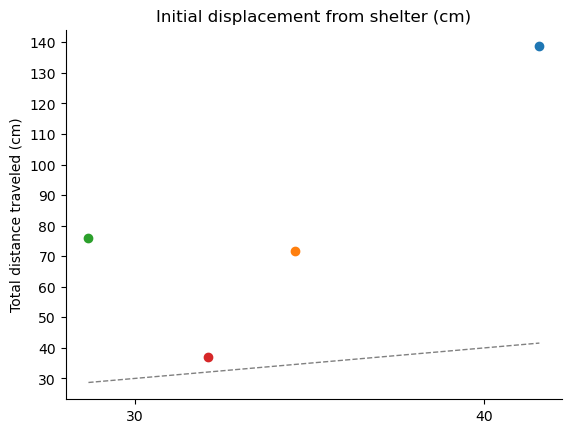

In [33]:
plot_linearity_ratio(n)